# Community

## Community discovery

In [ ]:
!pip install --user graphtools

In [1]:
from scipy.optimize import curve_fit
from sklearn import preprocessing
from cdlib import algorithms
import itertools
from cdlib import evaluation
from collections import Counter
from cdlib import NodeClustering
from networkx.generators.community import LFR_benchmark_graph

import networkx as nx
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import cdlib

Note: to be able to use all crisp methods, you need to install some additional packages:  {'wurlitzer', 'graph_tool'}
Note: to be able to use all overlapping methods, you need to install some additional packages:  {'ASLPAw'}
Note: to be able to use all bipartite methods, you need to install some additional packages:  {'wurlitzer'}


In [2]:
#Import the newtwork from the edgelist
rank = pd.read_csv('words_ranking.csv')
G =nx.read_edgelist("elect_dict.edgelist")
# G.remove_edges_from(nx.selfloop_edges(G))
# G=nx.convert_node_labels_to_integers(G)  #NB: the communities change if use integers as labels
# G.nodes

In [3]:
rank=rank.set_index('Word')

### Community Discovery algorithm(s) selection and configuration (to top)
After having defined the graph, we can select the algorithm(s) to partition it.

In [4]:
leiden_coms = algorithms.leiden(G)
lp_coms = algorithms.label_propagation(G)
walk_coms =  algorithms.walktrap(G)

In [9]:
import networkx.algorithms.community as nx_comm
nx_comm.modularity(G, walk_coms.communities),nx_comm.modularity(G, lp_coms.communities),nx_comm.modularity(G, leiden_coms.communities)

(0.24480104224284097, 0.44432347528092686, 0.6219018403960177)

# Leiden

In [17]:
len(leiden_coms.communities),leiden_coms.overlap, leiden_coms.node_coverage

(1762, False, 1.0)

In [18]:
#NB:Communities algorithms on communities can be useful?
H = G.subgraph(leiden_coms.communities[0])
(H.number_of_nodes(),H.number_of_edges(),nx.density(H))
leiden_Hcoms = algorithms.leiden(H)

### Clustering Evaluation (Fitness functions) (to top)
After having obtained a network clustering we can compute several indexes upon it.

In [19]:
leiden_coms.average_internal_degree()

FitnessResult(min=1.0, max=4.825492158825492, score=1.1263725168450565, std=0.2878174083428464)

In [20]:
leiden_coms.average_internal_degree(summary=False)

[4.825492158825492,
 3.117998506348021,
 3.4800621439668564,
 2.9646017699115044,
 3.013205282112845,
 2.844984802431611,
 2.203497615262321,
 2.300500834724541,
 2.2525951557093427,
 2.16969696969697,
 2.7107438016528924,
 2.2148760330578514,
 2.19831223628692,
 2.334056399132321,
 2.3207126948775056,
 2.163170163170163,
 2.411764705882353,
 2.3230769230769233,
 2.125,
 2.2613636363636362,
 2.1,
 2.2949852507374633,
 2.116923076923077,
 2.191950464396285,
 2.2356687898089174,
 2.1545064377682404,
 2.1233480176211454,
 2.0205128205128204,
 2.2061855670103094,
 2.0105263157894737,
 2.130434782608696,
 2.0352941176470587,
 2.05,
 2.064935064935065,
 2.0,
 2.511627906976744,
 2.0,
 2.6666666666666665,
 1.8666666666666667,
 1.8666666666666667,
 1.8666666666666667,
 1.8571428571428572,
 1.8461538461538463,
 1.8333333333333333,
 1.8181818181818181,
 2.0,
 1.8,
 1.8,
 1.8,
 1.8,
 1.7777777777777777,
 1.7777777777777777,
 1.7777777777777777,
 1.7777777777777777,
 2.888888888888889,
 1.75,
 1.7

In [21]:
evaluation.average_internal_degree(G, leiden_coms)

FitnessResult(min=1.0, max=4.825492158825492, score=1.1263725168450565, std=0.2878174083428464)

### Clustering Evaluation (Comparison)

In [22]:
leiden_coms.normalized_mutual_information(lp_coms),leiden_coms.normalized_mutual_information(walk_coms)

(MatchingResult(score=0.6607411988520139, std=None),
 MatchingResult(score=0.617005165362048, std=None))

In [23]:
evaluation.normalized_mutual_information(leiden_coms, lp_coms), evaluation.normalized_mutual_information(leiden_coms, walk_coms)

(MatchingResult(score=0.6607411988520139, std=None),
 MatchingResult(score=0.617005165362048, std=None))

### Community/Statistics Visualization (to top)
CDlib allows to generate two families of predefined plots:
network/community visualizations community fitness/comparison visualizations

In [11]:
from cdlib import viz

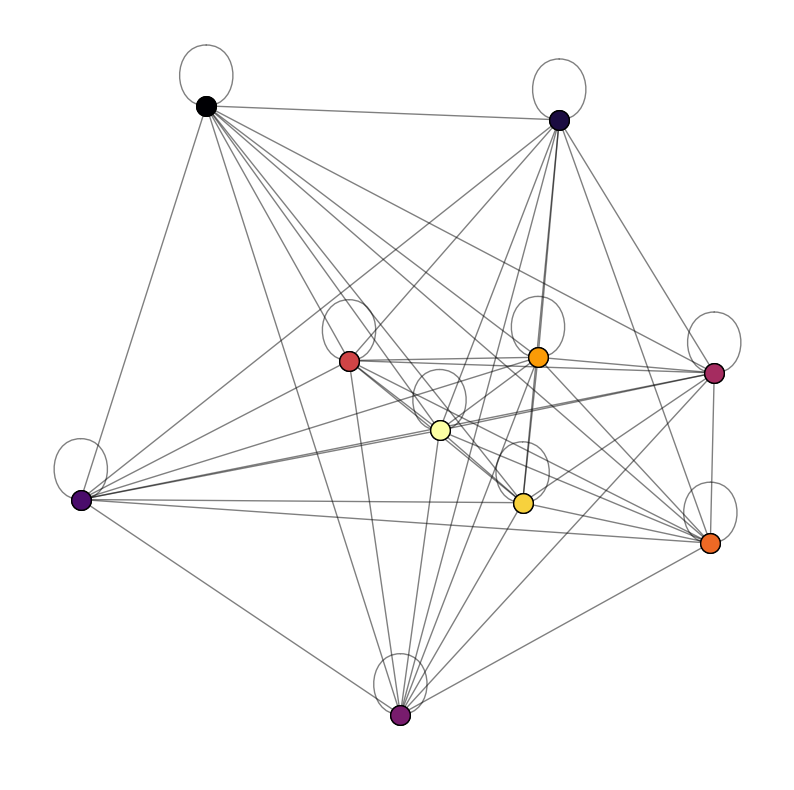

In [24]:
viz.plot_community_graph(G, leiden_coms, figsize=(10, 10),top_k=10, cmap='inferno_r')

 ## Intra and Inter communities words 

In [ ]:
#Intra-Communities words
for j in range(0, len(lp_coms.communities)):
    df=pd.DataFrame(lp_coms.communities[j], columns=['User'])
    comb=itertools.combinations(lp_coms.communities[j],2)
    l=[]
    if ((j>0)&(df.shape[0]>100)):                      #select the min size of the current comm
        for k in range(0, len(lp_coms.communities)):
            if (k!=j)&(len(lp_coms.communities[k])>50):
                for m in lp_coms.communities[k]:
                    for n in lp_coms.communities[j]:
                        if G.has_edge(m,n):
                            l.extend(G.edges[m,n]['tweet'])
                        else:pass
                dt=pd.DataFrame()
                dt['word']=l
                print(f"Intra-communities {j}-{k}")
                print(dt['word'].value_counts().nlargest(30))

In [16]:
#Inter-Communities words
for j in range(0, len(lp_coms.communities)):
    df=pd.DataFrame(lp_coms.communities[j], columns=['User'])
    comb=itertools.combinations(lp_coms.communities[j],2)     
    d=[]
    if df.shape[0]>10:
        for i in comb:
            if G.has_edge(i[0],i[1]):
                d.extend(G.edges[i[0],i[1]]['tweet'])
            else:pass
    dt=pd.DataFrame()
    dt['word']=d
    print(f"Community {j}")
    #NB:Choose to print only the 30 most common or the bar plot using the rank trashold
    print(dt['word'].value_counts().nlargest(30))
#     dt.drop(dt.columns.difference(['word']), axis=1, inplace=True)
#     dt['Count']=np.array(rank.loc[d]['Count'])
#     dt_mask=dt[dt['Count']>2000]
#     sns.barplot(data=dt_mask, x='Count', y='word', palette='dark')
#     sns.set(font_scale=0.7)
#     plt.show()

Community 0
fratelliditalia    2014
giorgiameloni      1390
isabellarauti       460
fdiparlamento       364
fdimilanoprov       299
lombardiafdi        293
fratelliroma        271
mai                 120
meloni              119
cosa                103
solo                 89
provitafamiglia      88
carettamc11          87
cazzo                85
già                  84
fatto                81
fare                 76
vergogna             75
no                   75
avere                73
sempre               72
fa                   71
fdiprovinciarm       69
prima                67
così                 66
italia               64
anni                 64
governo              62
poi                  62
quando               61
Name: word, dtype: int64
Community 1
carlocalenda     1376
azioneit          900
filipporossi      507
italiaviva        333
calenda           307
renzi             194
msgelmini         182
matteorenzi       150
solo              123
meloni            106
pd         

Community 39
dsantanche         36
fratelliditalia    28
giorgiameloni      10
sinistra            6
mai                 6
letta               5
te                  5
parte               4
vede                3
patrioti            3
solo                3
europa              3
segna               2
governare           2
verso               2
nazioni             2
pacchia             2
finirebbe           2
viene               2
fatto               2
calenda             2
dice                2
destra              2
fare                2
lombardiafdi        2
spettacolo          2
poi                 2
voglio              2
italiani            2
ronzulli            2
Name: word, dtype: int64
Community 40
politicaperjedi    36
calenda            14
letta              11
pd                  8
renzi               8
senza               5
conte               5
idee                5
meno                4
basta               4
dopo                4
fatto               4
fare                3
vot

Community 97
governo            29
governato          15
anni               13
renzi              12
alfano             10
verdini            10
comunisti           9
sinistra            7
centro              7
centrodestra        7
fratelliditalia     7
luciomalan          7
stato               7
guidocrosetto       6
ventotagliente      6
compreso            6
giorgiameloni       6
frances47066957     6
levidenza           6
negare              6
sempre              6
quindi              5
olegy               5
enricoletta         5
materassaio         5
poi                 5
monti               5
pd                  5
34                  4
fa                  4
Name: word, dtype: int64
Community 98
stefanoputinati    17
azioneit            6
recifar             6
cura                4
candidati           3
polo                3
terzo               3
pd                  3
voto                3
calenda             3
meglio              3
letta               3
spirito             2
pre

Community 167
letta             56
enricoletta       48
pdnetwork         38
robersperanza     28
pdmilano          26
pdlombardia       26
silviaroggiani    24
vpeluffo          24
cottarellicpi     24
sandrazampa       24
francese          24
solo              14
baghetta          12
vaccini           12
vota              12
lucertola         12
pdefunto          12
speranza           8
nemmeno            8
zero               8
capra              8
pinocchio          8
lavoro             8
qnd                8
ce                 8
scrivere           8
nonni              8
cazzate            8
squadra            8
cm                 8
Name: word, dtype: int64
Community 168
pastorellagiu      21
azioneit           15
italiaviva         13
proposta           11
alessandrospas1     8
cultura             6
adesso              6
gite                6
culturali           6
venezia             6
firenze             6
“fasciste”          6
roma                6
assolutamente       6
“fascista

Community 229
Series([], Name: word, dtype: int64)
Community 230
Series([], Name: word, dtype: int64)
Community 231
Series([], Name: word, dtype: int64)
Community 232
Series([], Name: word, dtype: int64)
Community 233
Series([], Name: word, dtype: int64)
Community 234
Series([], Name: word, dtype: int64)
Community 235
Series([], Name: word, dtype: int64)
Community 236
Series([], Name: word, dtype: int64)
Community 237
Series([], Name: word, dtype: int64)
Community 238
Series([], Name: word, dtype: int64)
Community 239
Series([], Name: word, dtype: int64)
Community 240
Series([], Name: word, dtype: int64)
Community 241
Series([], Name: word, dtype: int64)
Community 242
Series([], Name: word, dtype: int64)
Community 243
Series([], Name: word, dtype: int64)
Community 244
Series([], Name: word, dtype: int64)
Community 245
Series([], Name: word, dtype: int64)
Community 246
Series([], Name: word, dtype: int64)
Community 247
Series([], Name: word, dtype: int64)
Community 248
Series([], Name: 

Community 476
Series([], Name: word, dtype: int64)
Community 477
Series([], Name: word, dtype: int64)
Community 478
Series([], Name: word, dtype: int64)
Community 479
Series([], Name: word, dtype: int64)
Community 480
Series([], Name: word, dtype: int64)
Community 481
Series([], Name: word, dtype: int64)
Community 482
Series([], Name: word, dtype: int64)
Community 483
Series([], Name: word, dtype: int64)
Community 484
Series([], Name: word, dtype: int64)
Community 485
Series([], Name: word, dtype: int64)
Community 486
Series([], Name: word, dtype: int64)
Community 487
Series([], Name: word, dtype: int64)
Community 488
Series([], Name: word, dtype: int64)
Community 489
Series([], Name: word, dtype: int64)
Community 490
Series([], Name: word, dtype: int64)
Community 491
Series([], Name: word, dtype: int64)
Community 492
Series([], Name: word, dtype: int64)
Community 493
Series([], Name: word, dtype: int64)
Community 494
Series([], Name: word, dtype: int64)
Community 495
Series([], Name: 

Community 727
Series([], Name: word, dtype: int64)
Community 728
Series([], Name: word, dtype: int64)
Community 729
Series([], Name: word, dtype: int64)
Community 730
Series([], Name: word, dtype: int64)
Community 731
Series([], Name: word, dtype: int64)
Community 732
Series([], Name: word, dtype: int64)
Community 733
Series([], Name: word, dtype: int64)
Community 734
Series([], Name: word, dtype: int64)
Community 735
Series([], Name: word, dtype: int64)
Community 736
Series([], Name: word, dtype: int64)
Community 737
Series([], Name: word, dtype: int64)
Community 738
Series([], Name: word, dtype: int64)
Community 739
Series([], Name: word, dtype: int64)
Community 740
Series([], Name: word, dtype: int64)
Community 741
Series([], Name: word, dtype: int64)
Community 742
Series([], Name: word, dtype: int64)
Community 743
Series([], Name: word, dtype: int64)
Community 744
Series([], Name: word, dtype: int64)
Community 745
Series([], Name: word, dtype: int64)
Community 746
Series([], Name: 

Community 1016
Series([], Name: word, dtype: int64)
Community 1017
Series([], Name: word, dtype: int64)
Community 1018
Series([], Name: word, dtype: int64)
Community 1019
Series([], Name: word, dtype: int64)
Community 1020
Series([], Name: word, dtype: int64)
Community 1021
Series([], Name: word, dtype: int64)
Community 1022
Series([], Name: word, dtype: int64)
Community 1023
Series([], Name: word, dtype: int64)
Community 1024
Series([], Name: word, dtype: int64)
Community 1025
Series([], Name: word, dtype: int64)
Community 1026
Series([], Name: word, dtype: int64)
Community 1027
Series([], Name: word, dtype: int64)
Community 1028
Series([], Name: word, dtype: int64)
Community 1029
Series([], Name: word, dtype: int64)
Community 1030
Series([], Name: word, dtype: int64)
Community 1031
Series([], Name: word, dtype: int64)
Community 1032
Series([], Name: word, dtype: int64)
Community 1033
Series([], Name: word, dtype: int64)
Community 1034
Series([], Name: word, dtype: int64)
Community 10

Series([], Name: word, dtype: int64)
Community 1308
Series([], Name: word, dtype: int64)
Community 1309
Series([], Name: word, dtype: int64)
Community 1310
Series([], Name: word, dtype: int64)
Community 1311
Series([], Name: word, dtype: int64)
Community 1312
Series([], Name: word, dtype: int64)
Community 1313
Series([], Name: word, dtype: int64)
Community 1314
Series([], Name: word, dtype: int64)
Community 1315
Series([], Name: word, dtype: int64)
Community 1316
Series([], Name: word, dtype: int64)
Community 1317
Series([], Name: word, dtype: int64)
Community 1318
Series([], Name: word, dtype: int64)
Community 1319
Series([], Name: word, dtype: int64)
Community 1320
Series([], Name: word, dtype: int64)
Community 1321
Series([], Name: word, dtype: int64)
Community 1322
Series([], Name: word, dtype: int64)
Community 1323
Series([], Name: word, dtype: int64)
Community 1324
Series([], Name: word, dtype: int64)
Community 1325
Series([], Name: word, dtype: int64)
Community 1326
Series([], N

Community 1581
Series([], Name: word, dtype: int64)
Community 1582
Series([], Name: word, dtype: int64)
Community 1583
Series([], Name: word, dtype: int64)
Community 1584
Series([], Name: word, dtype: int64)
Community 1585
Series([], Name: word, dtype: int64)
Community 1586
Series([], Name: word, dtype: int64)
Community 1587
Series([], Name: word, dtype: int64)
Community 1588
Series([], Name: word, dtype: int64)
Community 1589
Series([], Name: word, dtype: int64)
Community 1590
Series([], Name: word, dtype: int64)
Community 1591
Series([], Name: word, dtype: int64)
Community 1592
Series([], Name: word, dtype: int64)
Community 1593
Series([], Name: word, dtype: int64)
Community 1594
Series([], Name: word, dtype: int64)
Community 1595
Series([], Name: word, dtype: int64)
Community 1596
Series([], Name: word, dtype: int64)
Community 1597
Series([], Name: word, dtype: int64)
Community 1598
Series([], Name: word, dtype: int64)
Community 1599
Series([], Name: word, dtype: int64)
Community 16

Series([], Name: word, dtype: int64)
Community 1850
Series([], Name: word, dtype: int64)
Community 1851
Series([], Name: word, dtype: int64)
Community 1852
Series([], Name: word, dtype: int64)
Community 1853
Series([], Name: word, dtype: int64)
Community 1854
Series([], Name: word, dtype: int64)
Community 1855
Series([], Name: word, dtype: int64)
Community 1856
Series([], Name: word, dtype: int64)
Community 1857
Series([], Name: word, dtype: int64)
Community 1858
Series([], Name: word, dtype: int64)
Community 1859
Series([], Name: word, dtype: int64)
Community 1860
Series([], Name: word, dtype: int64)
Community 1861
Series([], Name: word, dtype: int64)
Community 1862
Series([], Name: word, dtype: int64)
Community 1863
Series([], Name: word, dtype: int64)
Community 1864
Series([], Name: word, dtype: int64)
Community 1865
Series([], Name: word, dtype: int64)
Community 1866
Series([], Name: word, dtype: int64)
Community 1867
Series([], Name: word, dtype: int64)
Community 1868
Series([], N

Community 2026
Series([], Name: word, dtype: int64)
Community 2027
Series([], Name: word, dtype: int64)
Community 2028
Series([], Name: word, dtype: int64)
Community 2029
Series([], Name: word, dtype: int64)
Community 2030
Series([], Name: word, dtype: int64)
Community 2031
Series([], Name: word, dtype: int64)
Community 2032
Series([], Name: word, dtype: int64)
Community 2033
Series([], Name: word, dtype: int64)
Community 2034
Series([], Name: word, dtype: int64)
Community 2035
Series([], Name: word, dtype: int64)
Community 2036
Series([], Name: word, dtype: int64)
Community 2037
Series([], Name: word, dtype: int64)
Community 2038
Series([], Name: word, dtype: int64)
Community 2039
Series([], Name: word, dtype: int64)
Community 2040
Series([], Name: word, dtype: int64)
Community 2041
Series([], Name: word, dtype: int64)
Community 2042
Series([], Name: word, dtype: int64)
Community 2043
Series([], Name: word, dtype: int64)
Community 2044
Series([], Name: word, dtype: int64)
Community 20

Community 2208
Series([], Name: word, dtype: int64)
Community 2209
Series([], Name: word, dtype: int64)
Community 2210
Series([], Name: word, dtype: int64)
Community 2211
Series([], Name: word, dtype: int64)
Community 2212
Series([], Name: word, dtype: int64)
Community 2213
Series([], Name: word, dtype: int64)
Community 2214
Series([], Name: word, dtype: int64)
Community 2215
Series([], Name: word, dtype: int64)
Community 2216
Series([], Name: word, dtype: int64)
Community 2217
Series([], Name: word, dtype: int64)
Community 2218
Series([], Name: word, dtype: int64)
Community 2219
Series([], Name: word, dtype: int64)
Community 2220
Series([], Name: word, dtype: int64)
Community 2221
Series([], Name: word, dtype: int64)
Community 2222
Series([], Name: word, dtype: int64)
Community 2223
Series([], Name: word, dtype: int64)
Community 2224
Series([], Name: word, dtype: int64)
Community 2225
Series([], Name: word, dtype: int64)
Community 2226
Series([], Name: word, dtype: int64)
Community 22

Community 2370
Series([], Name: word, dtype: int64)
Community 2371
Series([], Name: word, dtype: int64)
Community 2372
Series([], Name: word, dtype: int64)
Community 2373
Series([], Name: word, dtype: int64)
Community 2374
Series([], Name: word, dtype: int64)
Community 2375
Series([], Name: word, dtype: int64)
Community 2376
Series([], Name: word, dtype: int64)
Community 2377
Series([], Name: word, dtype: int64)
Community 2378
Series([], Name: word, dtype: int64)
Community 2379
Series([], Name: word, dtype: int64)
Community 2380
Series([], Name: word, dtype: int64)
Community 2381
Series([], Name: word, dtype: int64)
Community 2382
Series([], Name: word, dtype: int64)
Community 2383
Series([], Name: word, dtype: int64)
Community 2384
Series([], Name: word, dtype: int64)
Community 2385
Series([], Name: word, dtype: int64)
Community 2386
Series([], Name: word, dtype: int64)
Community 2387
Series([], Name: word, dtype: int64)
Community 2388
Series([], Name: word, dtype: int64)
Community 23

Community 2639
Series([], Name: word, dtype: int64)
Community 2640
Series([], Name: word, dtype: int64)
Community 2641
Series([], Name: word, dtype: int64)
Community 2642
Series([], Name: word, dtype: int64)
Community 2643
Series([], Name: word, dtype: int64)
Community 2644
Series([], Name: word, dtype: int64)
Community 2645
Series([], Name: word, dtype: int64)
Community 2646
Series([], Name: word, dtype: int64)
Community 2647
Series([], Name: word, dtype: int64)
Community 2648
Series([], Name: word, dtype: int64)
Community 2649
Series([], Name: word, dtype: int64)
Community 2650
Series([], Name: word, dtype: int64)
Community 2651
Series([], Name: word, dtype: int64)
Community 2652
Series([], Name: word, dtype: int64)
Community 2653
Series([], Name: word, dtype: int64)
Community 2654
Series([], Name: word, dtype: int64)
Community 2655
Series([], Name: word, dtype: int64)
Community 2656
Series([], Name: word, dtype: int64)
Community 2657
Series([], Name: word, dtype: int64)
Community 26

Series([], Name: word, dtype: int64)
Community 2905
Series([], Name: word, dtype: int64)
Community 2906
Series([], Name: word, dtype: int64)
Community 2907
Series([], Name: word, dtype: int64)
Community 2908
Series([], Name: word, dtype: int64)
Community 2909
Series([], Name: word, dtype: int64)
Community 2910
Series([], Name: word, dtype: int64)
Community 2911
Series([], Name: word, dtype: int64)
Community 2912
Series([], Name: word, dtype: int64)
Community 2913
Series([], Name: word, dtype: int64)
Community 2914
Series([], Name: word, dtype: int64)
Community 2915
Series([], Name: word, dtype: int64)
Community 2916
Series([], Name: word, dtype: int64)
Community 2917
Series([], Name: word, dtype: int64)
Community 2918
Series([], Name: word, dtype: int64)
Community 2919
Series([], Name: word, dtype: int64)
Community 2920
Series([], Name: word, dtype: int64)
Community 2921
Series([], Name: word, dtype: int64)
Community 2922
Series([], Name: word, dtype: int64)
Community 2923
Series([], N

Community 3156
Series([], Name: word, dtype: int64)
Community 3157
Series([], Name: word, dtype: int64)
Community 3158
Series([], Name: word, dtype: int64)
Community 3159
Series([], Name: word, dtype: int64)
Community 3160
Series([], Name: word, dtype: int64)
Community 3161
Series([], Name: word, dtype: int64)
Community 3162
Series([], Name: word, dtype: int64)
Community 3163
Series([], Name: word, dtype: int64)
Community 3164
Series([], Name: word, dtype: int64)
Community 3165
Series([], Name: word, dtype: int64)
Community 3166
Series([], Name: word, dtype: int64)
Community 3167
Series([], Name: word, dtype: int64)
Community 3168
Series([], Name: word, dtype: int64)
Community 3169
Series([], Name: word, dtype: int64)
Community 3170
Series([], Name: word, dtype: int64)
Community 3171
Series([], Name: word, dtype: int64)
Community 3172
Series([], Name: word, dtype: int64)
Community 3173
Series([], Name: word, dtype: int64)
Community 3174
Series([], Name: word, dtype: int64)
Community 31

Community 3408
Series([], Name: word, dtype: int64)
Community 3409
Series([], Name: word, dtype: int64)
Community 3410
Series([], Name: word, dtype: int64)
Community 3411
Series([], Name: word, dtype: int64)
Community 3412
Series([], Name: word, dtype: int64)
Community 3413
Series([], Name: word, dtype: int64)
Community 3414
Series([], Name: word, dtype: int64)
Community 3415
Series([], Name: word, dtype: int64)
Community 3416
Series([], Name: word, dtype: int64)
Community 3417
Series([], Name: word, dtype: int64)
Community 3418
Series([], Name: word, dtype: int64)
Community 3419
Series([], Name: word, dtype: int64)
Community 3420
Series([], Name: word, dtype: int64)
Community 3421
Series([], Name: word, dtype: int64)
Community 3422
Series([], Name: word, dtype: int64)
Community 3423
Series([], Name: word, dtype: int64)
Community 3424
Series([], Name: word, dtype: int64)
Community 3425
Series([], Name: word, dtype: int64)
Community 3426
Series([], Name: word, dtype: int64)
Community 34

Community 3653
Series([], Name: word, dtype: int64)
Community 3654
Series([], Name: word, dtype: int64)
Community 3655
Series([], Name: word, dtype: int64)
Community 3656
Series([], Name: word, dtype: int64)
Community 3657
Series([], Name: word, dtype: int64)
Community 3658
Series([], Name: word, dtype: int64)
Community 3659
Series([], Name: word, dtype: int64)
Community 3660
Series([], Name: word, dtype: int64)
Community 3661
Series([], Name: word, dtype: int64)
Community 3662
Series([], Name: word, dtype: int64)
Community 3663
Series([], Name: word, dtype: int64)
Community 3664
Series([], Name: word, dtype: int64)
Community 3665
Series([], Name: word, dtype: int64)
Community 3666
Series([], Name: word, dtype: int64)
Community 3667
Series([], Name: word, dtype: int64)
Community 3668
Series([], Name: word, dtype: int64)
Community 3669
Series([], Name: word, dtype: int64)
Community 3670
Series([], Name: word, dtype: int64)
Community 3671
Series([], Name: word, dtype: int64)
Community 36

Community 3878
Series([], Name: word, dtype: int64)
Community 3879
Series([], Name: word, dtype: int64)
Community 3880
Series([], Name: word, dtype: int64)
Community 3881
Series([], Name: word, dtype: int64)
Community 3882
Series([], Name: word, dtype: int64)
Community 3883
Series([], Name: word, dtype: int64)
Community 3884
Series([], Name: word, dtype: int64)
Community 3885
Series([], Name: word, dtype: int64)
Community 3886
Series([], Name: word, dtype: int64)
Community 3887
Series([], Name: word, dtype: int64)
Community 3888
Series([], Name: word, dtype: int64)
Community 3889
Series([], Name: word, dtype: int64)
Community 3890
Series([], Name: word, dtype: int64)
Community 3891
Series([], Name: word, dtype: int64)
Community 3892
Series([], Name: word, dtype: int64)
Community 3893
Series([], Name: word, dtype: int64)
Community 3894
Series([], Name: word, dtype: int64)
Community 3895
Series([], Name: word, dtype: int64)
Community 3896
Series([], Name: word, dtype: int64)
Community 38

Series([], Name: word, dtype: int64)
Community 4126
Series([], Name: word, dtype: int64)
Community 4127
Series([], Name: word, dtype: int64)
Community 4128
Series([], Name: word, dtype: int64)
Community 4129
Series([], Name: word, dtype: int64)
Community 4130
Series([], Name: word, dtype: int64)
Community 4131
Series([], Name: word, dtype: int64)
Community 4132
Series([], Name: word, dtype: int64)
Community 4133
Series([], Name: word, dtype: int64)
Community 4134
Series([], Name: word, dtype: int64)
Community 4135
Series([], Name: word, dtype: int64)
Community 4136
Series([], Name: word, dtype: int64)
Community 4137
Series([], Name: word, dtype: int64)
Community 4138
Series([], Name: word, dtype: int64)
Community 4139
Series([], Name: word, dtype: int64)
Community 4140
Series([], Name: word, dtype: int64)
Community 4141
Series([], Name: word, dtype: int64)
Community 4142
Series([], Name: word, dtype: int64)
Community 4143
Series([], Name: word, dtype: int64)
Community 4144
Series([], N

Series([], Name: word, dtype: int64)
Community 4337
Series([], Name: word, dtype: int64)
Community 4338
Series([], Name: word, dtype: int64)
Community 4339
Series([], Name: word, dtype: int64)
Community 4340
Series([], Name: word, dtype: int64)
Community 4341
Series([], Name: word, dtype: int64)
Community 4342
Series([], Name: word, dtype: int64)
Community 4343
Series([], Name: word, dtype: int64)
Community 4344
Series([], Name: word, dtype: int64)
Community 4345
Series([], Name: word, dtype: int64)
Community 4346
Series([], Name: word, dtype: int64)
Community 4347
Series([], Name: word, dtype: int64)
Community 4348
Series([], Name: word, dtype: int64)
Community 4349
Series([], Name: word, dtype: int64)
Community 4350
Series([], Name: word, dtype: int64)
Community 4351
Series([], Name: word, dtype: int64)
Community 4352
Series([], Name: word, dtype: int64)
Community 4353
Series([], Name: word, dtype: int64)
Community 4354
Series([], Name: word, dtype: int64)
Community 4355
Series([], N

Series([], Name: word, dtype: int64)
Community 4607
Series([], Name: word, dtype: int64)
Community 4608
Series([], Name: word, dtype: int64)
Community 4609
Series([], Name: word, dtype: int64)
Community 4610
Series([], Name: word, dtype: int64)
Community 4611
Series([], Name: word, dtype: int64)
Community 4612
Series([], Name: word, dtype: int64)
Community 4613
Series([], Name: word, dtype: int64)
Community 4614
Series([], Name: word, dtype: int64)
Community 4615
Series([], Name: word, dtype: int64)
Community 4616
Series([], Name: word, dtype: int64)
Community 4617
Series([], Name: word, dtype: int64)
Community 4618
Series([], Name: word, dtype: int64)
Community 4619
Series([], Name: word, dtype: int64)
Community 4620
Series([], Name: word, dtype: int64)
Community 4621
Series([], Name: word, dtype: int64)
Community 4622
Series([], Name: word, dtype: int64)
Community 4623
Series([], Name: word, dtype: int64)
Community 4624
Series([], Name: word, dtype: int64)
Community 4625
Series([], N

Community 4833
Series([], Name: word, dtype: int64)
Community 4834
Series([], Name: word, dtype: int64)
Community 4835
Series([], Name: word, dtype: int64)
Community 4836
Series([], Name: word, dtype: int64)
Community 4837
Series([], Name: word, dtype: int64)
Community 4838
Series([], Name: word, dtype: int64)
Community 4839
Series([], Name: word, dtype: int64)
Community 4840
Series([], Name: word, dtype: int64)
Community 4841
Series([], Name: word, dtype: int64)
Community 4842
Series([], Name: word, dtype: int64)
Community 4843
Series([], Name: word, dtype: int64)
Community 4844
Series([], Name: word, dtype: int64)
Community 4845
Series([], Name: word, dtype: int64)
Community 4846
Series([], Name: word, dtype: int64)
Community 4847
Series([], Name: word, dtype: int64)
Community 4848
Series([], Name: word, dtype: int64)
Community 4849
Series([], Name: word, dtype: int64)
Community 4850
Series([], Name: word, dtype: int64)
Community 4851
Series([], Name: word, dtype: int64)
Community 48

Community 5099
Series([], Name: word, dtype: int64)
Community 5100
Series([], Name: word, dtype: int64)
Community 5101
Series([], Name: word, dtype: int64)
Community 5102
Series([], Name: word, dtype: int64)
Community 5103
Series([], Name: word, dtype: int64)
Community 5104
Series([], Name: word, dtype: int64)
Community 5105
Series([], Name: word, dtype: int64)
Community 5106
Series([], Name: word, dtype: int64)
Community 5107
Series([], Name: word, dtype: int64)
Community 5108
Series([], Name: word, dtype: int64)
Community 5109
Series([], Name: word, dtype: int64)
Community 5110
Series([], Name: word, dtype: int64)
Community 5111
Series([], Name: word, dtype: int64)
Community 5112
Series([], Name: word, dtype: int64)
Community 5113
Series([], Name: word, dtype: int64)
Community 5114
Series([], Name: word, dtype: int64)
Community 5115
Series([], Name: word, dtype: int64)
Community 5116
Series([], Name: word, dtype: int64)
Community 5117
Series([], Name: word, dtype: int64)
Community 51

Community 5351
Series([], Name: word, dtype: int64)
Community 5352
Series([], Name: word, dtype: int64)
Community 5353
Series([], Name: word, dtype: int64)
Community 5354
Series([], Name: word, dtype: int64)
Community 5355
Series([], Name: word, dtype: int64)
Community 5356
Series([], Name: word, dtype: int64)
Community 5357
Series([], Name: word, dtype: int64)
Community 5358
Series([], Name: word, dtype: int64)
Community 5359
Series([], Name: word, dtype: int64)
Community 5360
Series([], Name: word, dtype: int64)
Community 5361
Series([], Name: word, dtype: int64)
Community 5362
Series([], Name: word, dtype: int64)
Community 5363
Series([], Name: word, dtype: int64)
Community 5364
Series([], Name: word, dtype: int64)
Community 5365
Series([], Name: word, dtype: int64)
Community 5366
Series([], Name: word, dtype: int64)
Community 5367
Series([], Name: word, dtype: int64)
Community 5368
Series([], Name: word, dtype: int64)
Community 5369
Series([], Name: word, dtype: int64)
Community 53

Community 5572
Series([], Name: word, dtype: int64)
Community 5573
Series([], Name: word, dtype: int64)
Community 5574
Series([], Name: word, dtype: int64)
Community 5575
Series([], Name: word, dtype: int64)
Community 5576
Series([], Name: word, dtype: int64)
Community 5577
Series([], Name: word, dtype: int64)
Community 5578
Series([], Name: word, dtype: int64)
Community 5579
Series([], Name: word, dtype: int64)
Community 5580
Series([], Name: word, dtype: int64)
Community 5581
Series([], Name: word, dtype: int64)
Community 5582
Series([], Name: word, dtype: int64)
Community 5583
Series([], Name: word, dtype: int64)
Community 5584
Series([], Name: word, dtype: int64)
Community 5585
Series([], Name: word, dtype: int64)
Community 5586
Series([], Name: word, dtype: int64)
Community 5587
Series([], Name: word, dtype: int64)
Community 5588
Series([], Name: word, dtype: int64)
Community 5589
Series([], Name: word, dtype: int64)
Community 5590
Series([], Name: word, dtype: int64)
Community 55

Series([], Name: word, dtype: int64)
Community 5845
Series([], Name: word, dtype: int64)
Community 5846
Series([], Name: word, dtype: int64)
Community 5847
Series([], Name: word, dtype: int64)
Community 5848
Series([], Name: word, dtype: int64)
Community 5849
Series([], Name: word, dtype: int64)
Community 5850
Series([], Name: word, dtype: int64)
Community 5851
Series([], Name: word, dtype: int64)
Community 5852
Series([], Name: word, dtype: int64)
Community 5853
Series([], Name: word, dtype: int64)
Community 5854
Series([], Name: word, dtype: int64)
Community 5855
Series([], Name: word, dtype: int64)
Community 5856
Series([], Name: word, dtype: int64)
Community 5857
Series([], Name: word, dtype: int64)
Community 5858
Series([], Name: word, dtype: int64)
Community 5859
Series([], Name: word, dtype: int64)
Community 5860
Series([], Name: word, dtype: int64)
Community 5861
Series([], Name: word, dtype: int64)
Community 5862
Series([], Name: word, dtype: int64)
Community 5863
Series([], N

Series([], Name: word, dtype: int64)
Community 6086
Series([], Name: word, dtype: int64)
Community 6087
Series([], Name: word, dtype: int64)
Community 6088
Series([], Name: word, dtype: int64)
Community 6089
Series([], Name: word, dtype: int64)
Community 6090
Series([], Name: word, dtype: int64)
Community 6091
Series([], Name: word, dtype: int64)
Community 6092
Series([], Name: word, dtype: int64)
Community 6093
Series([], Name: word, dtype: int64)
Community 6094
Series([], Name: word, dtype: int64)
Community 6095
Series([], Name: word, dtype: int64)
Community 6096
Series([], Name: word, dtype: int64)
Community 6097
Series([], Name: word, dtype: int64)
Community 6098
Series([], Name: word, dtype: int64)
Community 6099
Series([], Name: word, dtype: int64)
Community 6100
Series([], Name: word, dtype: int64)
Community 6101
Series([], Name: word, dtype: int64)
Community 6102
Series([], Name: word, dtype: int64)
Community 6103
Series([], Name: word, dtype: int64)
Community 6104
Series([], N

 # Label propagation

In [25]:
len(lp_coms.communities),lp_coms.overlap, lp_coms.node_coverage

(6241, False, 1.0)

### Clustering Evaluation

In [26]:
lp_coms.average_internal_degree()

FitnessResult(min=1.0, max=5.121951219512195, score=1.259359772164779, std=0.35677861313945813)

In [27]:
lp_coms.average_internal_degree(summary=False)

[2.7423117709437963,
 2.7661290322580645,
 3.3615384615384616,
 2.169576059850374,
 3.202797202797203,
 1.989247311827957,
 2.8926553672316384,
 2.4444444444444446,
 1.9859154929577465,
 4.916666666666667,
 2.1238938053097347,
 1.9791666666666667,
 2.0,
 4.54320987654321,
 1.971830985915493,
 2.121212121212121,
 1.9692307692307693,
 1.967741935483871,
 3.7049180327868854,
 4.137931034482759,
 1.9642857142857142,
 2.0,
 2.2448979591836733,
 3.5918367346938775,
 2.0,
 1.9545454545454546,
 2.5,
 1.9534883720930232,
 2.0,
 5.121951219512195,
 1.95,
 1.95,
 1.95,
 1.95,
 3.128205128205128,
 1.9473684210526316,
 3.4054054054054053,
 1.945945945945946,
 1.945945945945946,
 1.9444444444444444,
 1.9428571428571428,
 1.9428571428571428,
 1.9428571428571428,
 1.9411764705882353,
 1.9411764705882353,
 2.411764705882353,
 2.0,
 1.9393939393939394,
 2.75,
 1.9375,
 2.0,
 3.6,
 1.9310344827586208,
 1.9310344827586208,
 1.9285714285714286,
 1.9259259259259258,
 3.3333333333333335,
 1.9259259259259258,

In [28]:
from cdlib import evaluation

evaluation.average_internal_degree(G, lp_coms)

FitnessResult(min=1.0, max=5.121951219512195, score=1.259359772164779, std=0.35677861313945813)

### Clustering Evaluation (Comparison)

In [39]:
lp_coms.normalized_mutual_information(leiden_coms),lp_coms.normalized_mutual_information(walk_coms)

(MatchingResult(score=0.6607411988520139, std=None),
 MatchingResult(score=0.5976253580921187, std=None))

In [40]:
evaluation.normalized_mutual_information(lp_coms, leiden_coms),evaluation.normalized_mutual_information(lp_coms, walk_coms)

(MatchingResult(score=0.6607411988520139, std=None),
 MatchingResult(score=0.5976253580921187, std=None))

### Community/Statistics Visualization

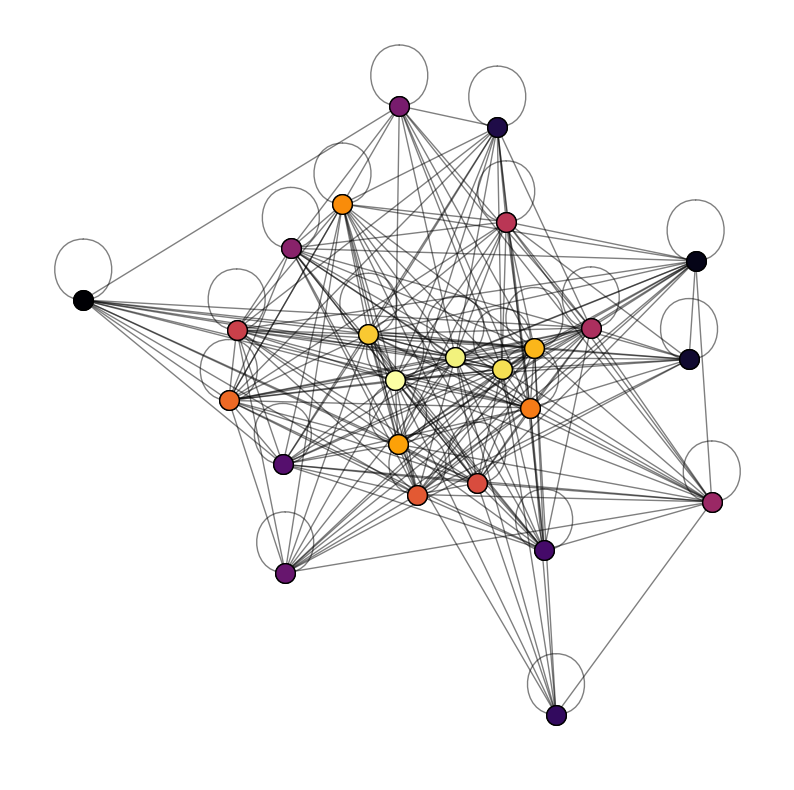

In [31]:
viz.plot_community_graph(G, lp_coms, figsize=(10, 10), min_size=45, cmap='inferno_r')

 ## Intra and Inter communities words 

In [ ]:
#Intra-Communities words
for j in range(0, len(lp_coms.communities)):
    df=pd.DataFrame(lp_coms.communities[j], columns=['User'])
    comb=itertools.combinations(lp_coms.communities[j],2)
    l=[]
    if ((j>0)&(df.shape[0]>100)):                      #select the min size of the current comm
        for k in range(0, len(lp_coms.communities)):
            if (k!=j)&(len(lp_coms.communities[k])>50):
                for m in lp_coms.communities[k]:
                    for n in lp_coms.communities[j]:
                        if G.has_edge(m,n):
                            l.extend(G.edges[m,n]['tweet'])
                        else:pass
                dt=pd.DataFrame()
                dt['word']=l
                print(f"Intra-communities {j}-{k}")
                print(dt['word'].value_counts().nlargest(30))
   

In [32]:
#Inter-Communities words
for j in range(0, len(lp_coms.communities)):
    df=pd.DataFrame(lp_coms.communities[j], columns=['User'])
    comb=itertools.combinations(lp_coms.communities[j],2)     
    d=[]
    if df.shape[0]>10:
        for i in comb:
            if G.has_edge(i[0],i[1]):
                d.extend(G.edges[i[0],i[1]]['tweet'])
            else:pass
    dt=pd.DataFrame()
    dt['word']=d
    print(f"Community {j}")
    #NB:Choose to print only the 30 most common or the bar plot using the rank trashold
    print(dt['word'].value_counts().nlargest(30))
#     dt.drop(dt.columns.difference(['word']), axis=1, inplace=True)
#     dt['Count']=np.array(rank.loc[d]['Count'])
#     dt_mask=dt[dt['Count']>2000]
#     sns.barplot(data=dt_mask, x='Count', y='word', palette='dark')
#     sns.set(font_scale=0.7)
#     plt.show()

Community 0
fratelliditalia    2014
giorgiameloni      1390
isabellarauti       460
fdiparlamento       364
fdimilanoprov       299
lombardiafdi        293
fratelliroma        271
mai                 120
meloni              119
cosa                103
solo                 89
provitafamiglia      88
carettamc11          87
cazzo                85
già                  84
fatto                81
fare                 76
vergogna             75
no                   75
avere                73
sempre               72
fa                   71
fdiprovinciarm       69
prima                67
così                 66
italia               64
anni                 64
governo              62
poi                  62
quando               61
Name: word, dtype: int64
Community 1
carlocalenda     1376
azioneit          900
filipporossi      507
italiaviva        333
calenda           307
renzi             194
msgelmini         182
matteorenzi       150
solo              123
meloni            106
pd         

Community 13
italiaviva         410
azioneit           402
meb                395
elenabonetti       347
lucianonobili      336
raffaellapaita     302
carlocalenda       258
bobogiac           251
valentinagrippo    152
matteorenzi         85
italiavivaroma1     84
mariettatidei       77
calabria            73
ilep                65
rullino             64
finito              64
raffaelepizzati     53
renzi               53
teresabellanova     50
fuori               48
lucianone           47
parlamento          45
però                44
adesso              43
resterete           42
te                  42
devi                40
dici                40
sentire             40
cugino              40
Name: word, dtype: int64
Community 14
repubblica                         80
via                                32
bonino                             26
meloni                             20
letta                              19
repubblicaitpolitica2022…          16
videorepubblicaitmetropolismet…

Community 45
simopillon         125
lucianinalitti     101
boninoemanuele      74
dumetri             73
patrizi09306335     44
animali             42
natura              38
altro               23
cervello            23
fatto               22
bonino              21
uomini              19
poi                 19
finora              18
cosa                17
serpenti            16
evidente            16
uccelli             16
parlare             16
animale             16
specie              16
lanima              14
notare              12
ancora              12
forse               12
solo                12
parte               11
sa                  11
pillon              11
fino                11
Name: word, dtype: int64
Community 46
rulajebreal        34
meloni             11
video               8
salvini             7
rula                5
fascismo            4
poi                 4
bugiarda            4
quindi              3
stato               3
elezioni            3
tweet            

Community 102
mediasettgcom24    17
invece              4
calenda             4
dire                3
leuropa             3
già                 2
vuole               2
europa              2
solo                2
ucraina             2
sola                2
fare                2
guerra              2
russia              2
italiani            2
unitamente          1
davanti             1
ovviamente          1
…                   1
te                  1
mov5stelle          1
aiuti               1
guarda              1
azioneit            1
sparire             1
bonino              1
balle               1
perso               1
riuscita            1
togliere            1
Name: word, dtype: int64
Community 103
erretti42          15
letta               5
mai                 4
pd                  4
m5s                 3
dire                3
quando              3
ancora              3
salvini             3
calenda             3
conte               3
fratelliditalia     2
movimento           2
s

Community 164
itsmeback       12
bonino           4
letta            4
meloni           3
mai              3
calenda          3
merda            2
sempre           2
mistero          2
finanzia         2
soros            2
renzi            2
assume           1
classifica       1
sfogo😈           1
prima            1
entra            1
tempo            1
svelato          1
stato            1
stupefacenti     1
bassa            1
grano            1
cerchi           1
posizione        1
neanche          1
scusate          1
momento          1
alternativa      1
qualunque        1
Name: word, dtype: int64
Community 165
gabrillasarti2    12
capito            12
quando            12
denunciato        12
contedraghi       12
raccogliere       12
adesioni          12
tutte             12
componenti        12
dissenso          12
oggi              12
abbandonato       12
ludovicotodini    12
l’idea            12
unico             12
soggetto          12
politico          12
troppi            12

Series([], Name: word, dtype: int64)
Community 229
Series([], Name: word, dtype: int64)
Community 230
Series([], Name: word, dtype: int64)
Community 231
Series([], Name: word, dtype: int64)
Community 232
Series([], Name: word, dtype: int64)
Community 233
Series([], Name: word, dtype: int64)
Community 234
Series([], Name: word, dtype: int64)
Community 235
Series([], Name: word, dtype: int64)
Community 236
Series([], Name: word, dtype: int64)
Community 237
Series([], Name: word, dtype: int64)
Community 238
Series([], Name: word, dtype: int64)
Community 239
Series([], Name: word, dtype: int64)
Community 240
Series([], Name: word, dtype: int64)
Community 241
Series([], Name: word, dtype: int64)
Community 242
Series([], Name: word, dtype: int64)
Community 243
Series([], Name: word, dtype: int64)
Community 244
Series([], Name: word, dtype: int64)
Community 245
Series([], Name: word, dtype: int64)
Community 246
Series([], Name: word, dtype: int64)
Community 247
Series([], Name: word, dtype: i

Series([], Name: word, dtype: int64)
Community 489
Series([], Name: word, dtype: int64)
Community 490
Series([], Name: word, dtype: int64)
Community 491
Series([], Name: word, dtype: int64)
Community 492
Series([], Name: word, dtype: int64)
Community 493
Series([], Name: word, dtype: int64)
Community 494
Series([], Name: word, dtype: int64)
Community 495
Series([], Name: word, dtype: int64)
Community 496
Series([], Name: word, dtype: int64)
Community 497
Series([], Name: word, dtype: int64)
Community 498
Series([], Name: word, dtype: int64)
Community 499
Series([], Name: word, dtype: int64)
Community 500
Series([], Name: word, dtype: int64)
Community 501
Series([], Name: word, dtype: int64)
Community 502
Series([], Name: word, dtype: int64)
Community 503
Series([], Name: word, dtype: int64)
Community 504
Series([], Name: word, dtype: int64)
Community 505
Series([], Name: word, dtype: int64)
Community 506
Series([], Name: word, dtype: int64)
Community 507
Series([], Name: word, dtype: i

Community 763
Series([], Name: word, dtype: int64)
Community 764
Series([], Name: word, dtype: int64)
Community 765
Series([], Name: word, dtype: int64)
Community 766
Series([], Name: word, dtype: int64)
Community 767
Series([], Name: word, dtype: int64)
Community 768
Series([], Name: word, dtype: int64)
Community 769
Series([], Name: word, dtype: int64)
Community 770
Series([], Name: word, dtype: int64)
Community 771
Series([], Name: word, dtype: int64)
Community 772
Series([], Name: word, dtype: int64)
Community 773
Series([], Name: word, dtype: int64)
Community 774
Series([], Name: word, dtype: int64)
Community 775
Series([], Name: word, dtype: int64)
Community 776
Series([], Name: word, dtype: int64)
Community 777
Series([], Name: word, dtype: int64)
Community 778
Series([], Name: word, dtype: int64)
Community 779
Series([], Name: word, dtype: int64)
Community 780
Series([], Name: word, dtype: int64)
Community 781
Series([], Name: word, dtype: int64)
Community 782
Series([], Name: 

Community 1029
Series([], Name: word, dtype: int64)
Community 1030
Series([], Name: word, dtype: int64)
Community 1031
Series([], Name: word, dtype: int64)
Community 1032
Series([], Name: word, dtype: int64)
Community 1033
Series([], Name: word, dtype: int64)
Community 1034
Series([], Name: word, dtype: int64)
Community 1035
Series([], Name: word, dtype: int64)
Community 1036
Series([], Name: word, dtype: int64)
Community 1037
Series([], Name: word, dtype: int64)
Community 1038
Series([], Name: word, dtype: int64)
Community 1039
Series([], Name: word, dtype: int64)
Community 1040
Series([], Name: word, dtype: int64)
Community 1041
Series([], Name: word, dtype: int64)
Community 1042
Series([], Name: word, dtype: int64)
Community 1043
Series([], Name: word, dtype: int64)
Community 1044
Series([], Name: word, dtype: int64)
Community 1045
Series([], Name: word, dtype: int64)
Community 1046
Series([], Name: word, dtype: int64)
Community 1047
Series([], Name: word, dtype: int64)
Community 10

Series([], Name: word, dtype: int64)
Community 1321
Series([], Name: word, dtype: int64)
Community 1322
Series([], Name: word, dtype: int64)
Community 1323
Series([], Name: word, dtype: int64)
Community 1324
Series([], Name: word, dtype: int64)
Community 1325
Series([], Name: word, dtype: int64)
Community 1326
Series([], Name: word, dtype: int64)
Community 1327
Series([], Name: word, dtype: int64)
Community 1328
Series([], Name: word, dtype: int64)
Community 1329
Series([], Name: word, dtype: int64)
Community 1330
Series([], Name: word, dtype: int64)
Community 1331
Series([], Name: word, dtype: int64)
Community 1332
Series([], Name: word, dtype: int64)
Community 1333
Series([], Name: word, dtype: int64)
Community 1334
Series([], Name: word, dtype: int64)
Community 1335
Series([], Name: word, dtype: int64)
Community 1336
Series([], Name: word, dtype: int64)
Community 1337
Series([], Name: word, dtype: int64)
Community 1338
Series([], Name: word, dtype: int64)
Community 1339
Series([], N

Series([], Name: word, dtype: int64)
Community 1599
Series([], Name: word, dtype: int64)
Community 1600
Series([], Name: word, dtype: int64)
Community 1601
Series([], Name: word, dtype: int64)
Community 1602
Series([], Name: word, dtype: int64)
Community 1603
Series([], Name: word, dtype: int64)
Community 1604
Series([], Name: word, dtype: int64)
Community 1605
Series([], Name: word, dtype: int64)
Community 1606
Series([], Name: word, dtype: int64)
Community 1607
Series([], Name: word, dtype: int64)
Community 1608
Series([], Name: word, dtype: int64)
Community 1609
Series([], Name: word, dtype: int64)
Community 1610
Series([], Name: word, dtype: int64)
Community 1611
Series([], Name: word, dtype: int64)
Community 1612
Series([], Name: word, dtype: int64)
Community 1613
Series([], Name: word, dtype: int64)
Community 1614
Series([], Name: word, dtype: int64)
Community 1615
Series([], Name: word, dtype: int64)
Community 1616
Series([], Name: word, dtype: int64)
Community 1617
Series([], N

Community 1848
Series([], Name: word, dtype: int64)
Community 1849
Series([], Name: word, dtype: int64)
Community 1850
Series([], Name: word, dtype: int64)
Community 1851
Series([], Name: word, dtype: int64)
Community 1852
Series([], Name: word, dtype: int64)
Community 1853
Series([], Name: word, dtype: int64)
Community 1854
Series([], Name: word, dtype: int64)
Community 1855
Series([], Name: word, dtype: int64)
Community 1856
Series([], Name: word, dtype: int64)
Community 1857
Series([], Name: word, dtype: int64)
Community 1858
Series([], Name: word, dtype: int64)
Community 1859
Series([], Name: word, dtype: int64)
Community 1860
Series([], Name: word, dtype: int64)
Community 1861
Series([], Name: word, dtype: int64)
Community 1862
Series([], Name: word, dtype: int64)
Community 1863
Series([], Name: word, dtype: int64)
Community 1864
Series([], Name: word, dtype: int64)
Community 1865
Series([], Name: word, dtype: int64)
Community 1866
Series([], Name: word, dtype: int64)
Community 18

Series([], Name: word, dtype: int64)
Community 2104
Series([], Name: word, dtype: int64)
Community 2105
Series([], Name: word, dtype: int64)
Community 2106
Series([], Name: word, dtype: int64)
Community 2107
Series([], Name: word, dtype: int64)
Community 2108
Series([], Name: word, dtype: int64)
Community 2109
Series([], Name: word, dtype: int64)
Community 2110
Series([], Name: word, dtype: int64)
Community 2111
Series([], Name: word, dtype: int64)
Community 2112
Series([], Name: word, dtype: int64)
Community 2113
Series([], Name: word, dtype: int64)
Community 2114
Series([], Name: word, dtype: int64)
Community 2115
Series([], Name: word, dtype: int64)
Community 2116
Series([], Name: word, dtype: int64)
Community 2117
Series([], Name: word, dtype: int64)
Community 2118
Series([], Name: word, dtype: int64)
Community 2119
Series([], Name: word, dtype: int64)
Community 2120
Series([], Name: word, dtype: int64)
Community 2121
Series([], Name: word, dtype: int64)
Community 2122
Series([], N

Series([], Name: word, dtype: int64)
Community 2391
Series([], Name: word, dtype: int64)
Community 2392
Series([], Name: word, dtype: int64)
Community 2393
Series([], Name: word, dtype: int64)
Community 2394
Series([], Name: word, dtype: int64)
Community 2395
Series([], Name: word, dtype: int64)
Community 2396
Series([], Name: word, dtype: int64)
Community 2397
Series([], Name: word, dtype: int64)
Community 2398
Series([], Name: word, dtype: int64)
Community 2399
Series([], Name: word, dtype: int64)
Community 2400
Series([], Name: word, dtype: int64)
Community 2401
Series([], Name: word, dtype: int64)
Community 2402
Series([], Name: word, dtype: int64)
Community 2403
Series([], Name: word, dtype: int64)
Community 2404
Series([], Name: word, dtype: int64)
Community 2405
Series([], Name: word, dtype: int64)
Community 2406
Series([], Name: word, dtype: int64)
Community 2407
Series([], Name: word, dtype: int64)
Community 2408
Series([], Name: word, dtype: int64)
Community 2409
Series([], N

Community 2633
Series([], Name: word, dtype: int64)
Community 2634
Series([], Name: word, dtype: int64)
Community 2635
Series([], Name: word, dtype: int64)
Community 2636
Series([], Name: word, dtype: int64)
Community 2637
Series([], Name: word, dtype: int64)
Community 2638
Series([], Name: word, dtype: int64)
Community 2639
Series([], Name: word, dtype: int64)
Community 2640
Series([], Name: word, dtype: int64)
Community 2641
Series([], Name: word, dtype: int64)
Community 2642
Series([], Name: word, dtype: int64)
Community 2643
Series([], Name: word, dtype: int64)
Community 2644
Series([], Name: word, dtype: int64)
Community 2645
Series([], Name: word, dtype: int64)
Community 2646
Series([], Name: word, dtype: int64)
Community 2647
Series([], Name: word, dtype: int64)
Community 2648
Series([], Name: word, dtype: int64)
Community 2649
Series([], Name: word, dtype: int64)
Community 2650
Series([], Name: word, dtype: int64)
Community 2651
Series([], Name: word, dtype: int64)
Community 26

Series([], Name: word, dtype: int64)
Community 2893
Series([], Name: word, dtype: int64)
Community 2894
Series([], Name: word, dtype: int64)
Community 2895
Series([], Name: word, dtype: int64)
Community 2896
Series([], Name: word, dtype: int64)
Community 2897
Series([], Name: word, dtype: int64)
Community 2898
Series([], Name: word, dtype: int64)
Community 2899
Series([], Name: word, dtype: int64)
Community 2900
Series([], Name: word, dtype: int64)
Community 2901
Series([], Name: word, dtype: int64)
Community 2902
Series([], Name: word, dtype: int64)
Community 2903
Series([], Name: word, dtype: int64)
Community 2904
Series([], Name: word, dtype: int64)
Community 2905
Series([], Name: word, dtype: int64)
Community 2906
Series([], Name: word, dtype: int64)
Community 2907
Series([], Name: word, dtype: int64)
Community 2908
Series([], Name: word, dtype: int64)
Community 2909
Series([], Name: word, dtype: int64)
Community 2910
Series([], Name: word, dtype: int64)
Community 2911
Series([], N

Series([], Name: word, dtype: int64)
Community 3134
Series([], Name: word, dtype: int64)
Community 3135
Series([], Name: word, dtype: int64)
Community 3136
Series([], Name: word, dtype: int64)
Community 3137
Series([], Name: word, dtype: int64)
Community 3138
Series([], Name: word, dtype: int64)
Community 3139
Series([], Name: word, dtype: int64)
Community 3140
Series([], Name: word, dtype: int64)
Community 3141
Series([], Name: word, dtype: int64)
Community 3142
Series([], Name: word, dtype: int64)
Community 3143
Series([], Name: word, dtype: int64)
Community 3144
Series([], Name: word, dtype: int64)
Community 3145
Series([], Name: word, dtype: int64)
Community 3146
Series([], Name: word, dtype: int64)
Community 3147
Series([], Name: word, dtype: int64)
Community 3148
Series([], Name: word, dtype: int64)
Community 3149
Series([], Name: word, dtype: int64)
Community 3150
Series([], Name: word, dtype: int64)
Community 3151
Series([], Name: word, dtype: int64)
Community 3152
Series([], N

Series([], Name: word, dtype: int64)
Community 3349
Series([], Name: word, dtype: int64)
Community 3350
Series([], Name: word, dtype: int64)
Community 3351
Series([], Name: word, dtype: int64)
Community 3352
Series([], Name: word, dtype: int64)
Community 3353
Series([], Name: word, dtype: int64)
Community 3354
Series([], Name: word, dtype: int64)
Community 3355
Series([], Name: word, dtype: int64)
Community 3356
Series([], Name: word, dtype: int64)
Community 3357
Series([], Name: word, dtype: int64)
Community 3358
Series([], Name: word, dtype: int64)
Community 3359
Series([], Name: word, dtype: int64)
Community 3360
Series([], Name: word, dtype: int64)
Community 3361
Series([], Name: word, dtype: int64)
Community 3362
Series([], Name: word, dtype: int64)
Community 3363
Series([], Name: word, dtype: int64)
Community 3364
Series([], Name: word, dtype: int64)
Community 3365
Series([], Name: word, dtype: int64)
Community 3366
Series([], Name: word, dtype: int64)
Community 3367
Series([], N

Community 3602
Series([], Name: word, dtype: int64)
Community 3603
Series([], Name: word, dtype: int64)
Community 3604
Series([], Name: word, dtype: int64)
Community 3605
Series([], Name: word, dtype: int64)
Community 3606
Series([], Name: word, dtype: int64)
Community 3607
Series([], Name: word, dtype: int64)
Community 3608
Series([], Name: word, dtype: int64)
Community 3609
Series([], Name: word, dtype: int64)
Community 3610
Series([], Name: word, dtype: int64)
Community 3611
Series([], Name: word, dtype: int64)
Community 3612
Series([], Name: word, dtype: int64)
Community 3613
Series([], Name: word, dtype: int64)
Community 3614
Series([], Name: word, dtype: int64)
Community 3615
Series([], Name: word, dtype: int64)
Community 3616
Series([], Name: word, dtype: int64)
Community 3617
Series([], Name: word, dtype: int64)
Community 3618
Series([], Name: word, dtype: int64)
Community 3619
Series([], Name: word, dtype: int64)
Community 3620
Series([], Name: word, dtype: int64)
Community 36

Community 3836
Series([], Name: word, dtype: int64)
Community 3837
Series([], Name: word, dtype: int64)
Community 3838
Series([], Name: word, dtype: int64)
Community 3839
Series([], Name: word, dtype: int64)
Community 3840
Series([], Name: word, dtype: int64)
Community 3841
Series([], Name: word, dtype: int64)
Community 3842
Series([], Name: word, dtype: int64)
Community 3843
Series([], Name: word, dtype: int64)
Community 3844
Series([], Name: word, dtype: int64)
Community 3845
Series([], Name: word, dtype: int64)
Community 3846
Series([], Name: word, dtype: int64)
Community 3847
Series([], Name: word, dtype: int64)
Community 3848
Series([], Name: word, dtype: int64)
Community 3849
Series([], Name: word, dtype: int64)
Community 3850
Series([], Name: word, dtype: int64)
Community 3851
Series([], Name: word, dtype: int64)
Community 3852
Series([], Name: word, dtype: int64)
Community 3853
Series([], Name: word, dtype: int64)
Community 3854
Series([], Name: word, dtype: int64)
Community 38

Community 4012
Series([], Name: word, dtype: int64)
Community 4013
Series([], Name: word, dtype: int64)
Community 4014
Series([], Name: word, dtype: int64)
Community 4015
Series([], Name: word, dtype: int64)
Community 4016
Series([], Name: word, dtype: int64)
Community 4017
Series([], Name: word, dtype: int64)
Community 4018
Series([], Name: word, dtype: int64)
Community 4019
Series([], Name: word, dtype: int64)
Community 4020
Series([], Name: word, dtype: int64)
Community 4021
Series([], Name: word, dtype: int64)
Community 4022
Series([], Name: word, dtype: int64)
Community 4023
Series([], Name: word, dtype: int64)
Community 4024
Series([], Name: word, dtype: int64)
Community 4025
Series([], Name: word, dtype: int64)
Community 4026
Series([], Name: word, dtype: int64)
Community 4027
Series([], Name: word, dtype: int64)
Community 4028
Series([], Name: word, dtype: int64)
Community 4029
Series([], Name: word, dtype: int64)
Community 4030
Series([], Name: word, dtype: int64)
Community 40

Community 4243
Series([], Name: word, dtype: int64)
Community 4244
Series([], Name: word, dtype: int64)
Community 4245
Series([], Name: word, dtype: int64)
Community 4246
Series([], Name: word, dtype: int64)
Community 4247
Series([], Name: word, dtype: int64)
Community 4248
Series([], Name: word, dtype: int64)
Community 4249
Series([], Name: word, dtype: int64)
Community 4250
Series([], Name: word, dtype: int64)
Community 4251
Series([], Name: word, dtype: int64)
Community 4252
Series([], Name: word, dtype: int64)
Community 4253
Series([], Name: word, dtype: int64)
Community 4254
Series([], Name: word, dtype: int64)
Community 4255
Series([], Name: word, dtype: int64)
Community 4256
Series([], Name: word, dtype: int64)
Community 4257
Series([], Name: word, dtype: int64)
Community 4258
Series([], Name: word, dtype: int64)
Community 4259
Series([], Name: word, dtype: int64)
Community 4260
Series([], Name: word, dtype: int64)
Community 4261
Series([], Name: word, dtype: int64)
Community 42

Community 4524
Series([], Name: word, dtype: int64)
Community 4525
Series([], Name: word, dtype: int64)
Community 4526
Series([], Name: word, dtype: int64)
Community 4527
Series([], Name: word, dtype: int64)
Community 4528
Series([], Name: word, dtype: int64)
Community 4529
Series([], Name: word, dtype: int64)
Community 4530
Series([], Name: word, dtype: int64)
Community 4531
Series([], Name: word, dtype: int64)
Community 4532
Series([], Name: word, dtype: int64)
Community 4533
Series([], Name: word, dtype: int64)
Community 4534
Series([], Name: word, dtype: int64)
Community 4535
Series([], Name: word, dtype: int64)
Community 4536
Series([], Name: word, dtype: int64)
Community 4537
Series([], Name: word, dtype: int64)
Community 4538
Series([], Name: word, dtype: int64)
Community 4539
Series([], Name: word, dtype: int64)
Community 4540
Series([], Name: word, dtype: int64)
Community 4541
Series([], Name: word, dtype: int64)
Community 4542
Series([], Name: word, dtype: int64)
Community 45

Series([], Name: word, dtype: int64)
Community 4766
Series([], Name: word, dtype: int64)
Community 4767
Series([], Name: word, dtype: int64)
Community 4768
Series([], Name: word, dtype: int64)
Community 4769
Series([], Name: word, dtype: int64)
Community 4770
Series([], Name: word, dtype: int64)
Community 4771
Series([], Name: word, dtype: int64)
Community 4772
Series([], Name: word, dtype: int64)
Community 4773
Series([], Name: word, dtype: int64)
Community 4774
Series([], Name: word, dtype: int64)
Community 4775
Series([], Name: word, dtype: int64)
Community 4776
Series([], Name: word, dtype: int64)
Community 4777
Series([], Name: word, dtype: int64)
Community 4778
Series([], Name: word, dtype: int64)
Community 4779
Series([], Name: word, dtype: int64)
Community 4780
Series([], Name: word, dtype: int64)
Community 4781
Series([], Name: word, dtype: int64)
Community 4782
Series([], Name: word, dtype: int64)
Community 4783
Series([], Name: word, dtype: int64)
Community 4784
Series([], N

Series([], Name: word, dtype: int64)
Community 5023
Series([], Name: word, dtype: int64)
Community 5024
Series([], Name: word, dtype: int64)
Community 5025
Series([], Name: word, dtype: int64)
Community 5026
Series([], Name: word, dtype: int64)
Community 5027
Series([], Name: word, dtype: int64)
Community 5028
Series([], Name: word, dtype: int64)
Community 5029
Series([], Name: word, dtype: int64)
Community 5030
Series([], Name: word, dtype: int64)
Community 5031
Series([], Name: word, dtype: int64)
Community 5032
Series([], Name: word, dtype: int64)
Community 5033
Series([], Name: word, dtype: int64)
Community 5034
Series([], Name: word, dtype: int64)
Community 5035
Series([], Name: word, dtype: int64)
Community 5036
Series([], Name: word, dtype: int64)
Community 5037
Series([], Name: word, dtype: int64)
Community 5038
Series([], Name: word, dtype: int64)
Community 5039
Series([], Name: word, dtype: int64)
Community 5040
Series([], Name: word, dtype: int64)
Community 5041
Series([], N

Community 5257
Series([], Name: word, dtype: int64)
Community 5258
Series([], Name: word, dtype: int64)
Community 5259
Series([], Name: word, dtype: int64)
Community 5260
Series([], Name: word, dtype: int64)
Community 5261
Series([], Name: word, dtype: int64)
Community 5262
Series([], Name: word, dtype: int64)
Community 5263
Series([], Name: word, dtype: int64)
Community 5264
Series([], Name: word, dtype: int64)
Community 5265
Series([], Name: word, dtype: int64)
Community 5266
Series([], Name: word, dtype: int64)
Community 5267
Series([], Name: word, dtype: int64)
Community 5268
Series([], Name: word, dtype: int64)
Community 5269
Series([], Name: word, dtype: int64)
Community 5270
Series([], Name: word, dtype: int64)
Community 5271
Series([], Name: word, dtype: int64)
Community 5272
Series([], Name: word, dtype: int64)
Community 5273
Series([], Name: word, dtype: int64)
Community 5274
Series([], Name: word, dtype: int64)
Community 5275
Series([], Name: word, dtype: int64)
Community 52

Community 5500
Series([], Name: word, dtype: int64)
Community 5501
Series([], Name: word, dtype: int64)
Community 5502
Series([], Name: word, dtype: int64)
Community 5503
Series([], Name: word, dtype: int64)
Community 5504
Series([], Name: word, dtype: int64)
Community 5505
Series([], Name: word, dtype: int64)
Community 5506
Series([], Name: word, dtype: int64)
Community 5507
Series([], Name: word, dtype: int64)
Community 5508
Series([], Name: word, dtype: int64)
Community 5509
Series([], Name: word, dtype: int64)
Community 5510
Series([], Name: word, dtype: int64)
Community 5511
Series([], Name: word, dtype: int64)
Community 5512
Series([], Name: word, dtype: int64)
Community 5513
Series([], Name: word, dtype: int64)
Community 5514
Series([], Name: word, dtype: int64)
Community 5515
Series([], Name: word, dtype: int64)
Community 5516
Series([], Name: word, dtype: int64)
Community 5517
Series([], Name: word, dtype: int64)
Community 5518
Series([], Name: word, dtype: int64)
Community 55

Community 5786
Series([], Name: word, dtype: int64)
Community 5787
Series([], Name: word, dtype: int64)
Community 5788
Series([], Name: word, dtype: int64)
Community 5789
Series([], Name: word, dtype: int64)
Community 5790
Series([], Name: word, dtype: int64)
Community 5791
Series([], Name: word, dtype: int64)
Community 5792
Series([], Name: word, dtype: int64)
Community 5793
Series([], Name: word, dtype: int64)
Community 5794
Series([], Name: word, dtype: int64)
Community 5795
Series([], Name: word, dtype: int64)
Community 5796
Series([], Name: word, dtype: int64)
Community 5797
Series([], Name: word, dtype: int64)
Community 5798
Series([], Name: word, dtype: int64)
Community 5799
Series([], Name: word, dtype: int64)
Community 5800
Series([], Name: word, dtype: int64)
Community 5801
Series([], Name: word, dtype: int64)
Community 5802
Series([], Name: word, dtype: int64)
Community 5803
Series([], Name: word, dtype: int64)
Community 5804
Series([], Name: word, dtype: int64)
Community 58

Community 6106
Series([], Name: word, dtype: int64)
Community 6107
Series([], Name: word, dtype: int64)
Community 6108
Series([], Name: word, dtype: int64)
Community 6109
Series([], Name: word, dtype: int64)
Community 6110
Series([], Name: word, dtype: int64)
Community 6111
Series([], Name: word, dtype: int64)
Community 6112
Series([], Name: word, dtype: int64)
Community 6113
Series([], Name: word, dtype: int64)
Community 6114
Series([], Name: word, dtype: int64)
Community 6115
Series([], Name: word, dtype: int64)
Community 6116
Series([], Name: word, dtype: int64)
Community 6117
Series([], Name: word, dtype: int64)
Community 6118
Series([], Name: word, dtype: int64)
Community 6119
Series([], Name: word, dtype: int64)
Community 6120
Series([], Name: word, dtype: int64)
Community 6121
Series([], Name: word, dtype: int64)
Community 6122
Series([], Name: word, dtype: int64)
Community 6123
Series([], Name: word, dtype: int64)
Community 6124
Series([], Name: word, dtype: int64)
Community 61

# Walktrap

In [33]:
len(walk_coms.communities),walk_coms.overlap, walk_coms.node_coverage

(3067, False, 1.0)

### Clustering Evaluation

In [34]:
walk_coms.average_internal_degree()

FitnessResult(min=1.0, max=4.840783111215945, score=1.1848404234448784, std=0.2999793679931137)

In [35]:
walk_coms.average_internal_degree(summary=False)

[4.840783111215945,
 3.033333333333333,
 2.326530612244898,
 1.9565217391304348,
 1.9555555555555555,
 2.511627906976744,
 1.9487179487179487,
 1.9473684210526316,
 1.9444444444444444,
 1.9411764705882353,
 2.1481481481481484,
 1.9259259259259258,
 1.92,
 2.0,
 1.9166666666666667,
 2.1818181818181817,
 1.9047619047619047,
 2.7,
 2.4,
 2.0,
 1.894736842105263,
 1.8888888888888888,
 2.0,
 1.8888888888888888,
 1.8823529411764706,
 1.8823529411764706,
 1.8823529411764706,
 1.8823529411764706,
 2.25,
 1.8666666666666667,
 2.6666666666666665,
 1.8666666666666667,
 1.8666666666666667,
 2.0,
 2.0,
 1.8571428571428572,
 2.0,
 1.8461538461538463,
 2.0,
 1.8461538461538463,
 1.8461538461538463,
 1.8461538461538463,
 1.8333333333333333,
 1.8333333333333333,
 1.8333333333333333,
 1.8333333333333333,
 1.8333333333333333,
 1.8333333333333333,
 1.8333333333333333,
 1.8181818181818181,
 1.8181818181818181,
 1.8181818181818181,
 1.8181818181818181,
 1.8181818181818181,
 1.8181818181818181,
 2.0,
 1.8181

In [36]:
evaluation.average_internal_degree(G, walk_coms)

FitnessResult(min=1.0, max=4.840783111215945, score=1.1848404234448784, std=0.2999793679931137)

### Clustering Evaluation (Comparison)

In [41]:
walk_coms.normalized_mutual_information(leiden_coms),walk_coms.normalized_mutual_information(lp_coms)

(MatchingResult(score=0.617005165362048, std=None),
 MatchingResult(score=0.5976253580921187, std=None))

In [42]:
evaluation.normalized_mutual_information(walk_coms, leiden_coms),evaluation.normalized_mutual_information(walk_coms, lp_coms)

(MatchingResult(score=0.617005165362048, std=None),
 MatchingResult(score=0.5976253580921187, std=None))

### Community/Statistics Visualization

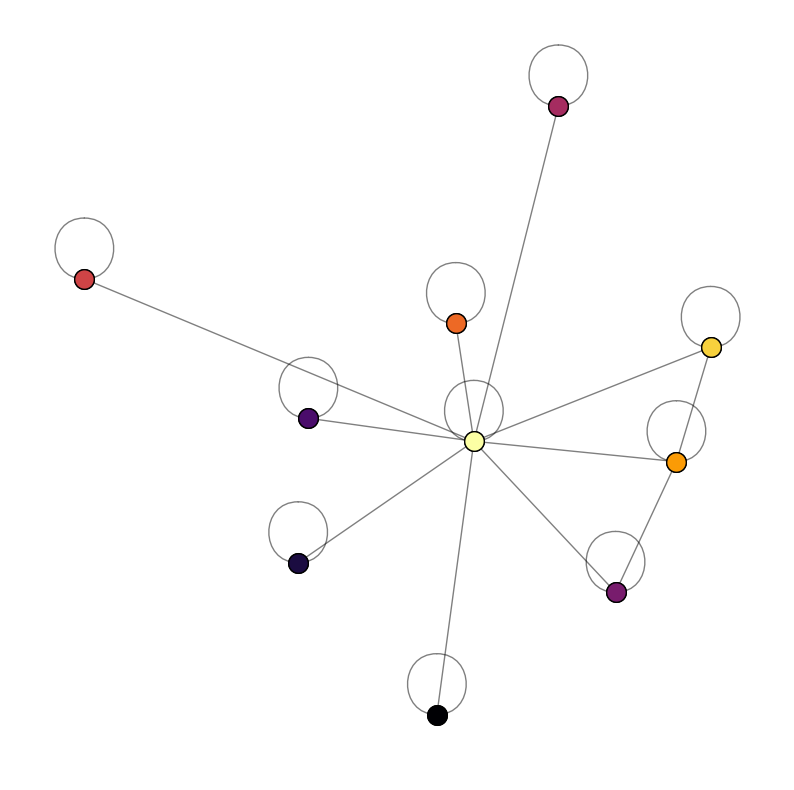

In [45]:
viz.plot_community_graph(G, walk_coms, figsize=(10, 10), top_k=10, cmap='inferno_r')

 ## Intra and Inter communities words 

In [ ]:
#Intra-Communities words
for j in range(0, len(walk_coms.communities)):
    df=pd.DataFrame(walk_coms.communities[j], columns=['User'])
    comb=itertools.combinations(walk_coms.communities[j],2)
    l=[]
    if ((j>0)&(df.shape[0]>100)):                      #select the min size of the current comm
        for k in range(0, len(walk_coms.communities)):
            if (k!=j)&(len(walk_coms.communities[k])>50):
                for m in walk_coms.communities[k]:
                    for n in walk_coms.communities[j]:
                        if G.has_edge(m,n):
                            l.extend(G.edges[m,n]['tweet'])
                        else:pass
                dt=pd.DataFrame()
                dt['word']=l
                print(f"Intra-communities {j}-{k}")
                print(dt['word'].value_counts().nlargest(30))
   

In [46]:
#Inter-Communities words
for j in range(0, len(walk_coms.communities)):
    df=pd.DataFrame(walk_coms.communities[j], columns=['User'])
    comb=itertools.combinations(walk_coms.communities[j],2)     
    d=[]
    if df.shape[0]>10:
        for i in comb:
            if G.has_edge(i[0],i[1]):
                d.extend(G.edges[i[0],i[1]]['tweet'])
            else:pass
    dt=pd.DataFrame()
    dt['word']=d
    print(f"Community {j}")
    #NB:Choose to print only the 30 most common or the bar plot using the rank trashold
    print(dt['word'].value_counts().nlargest(30))
#     dt.drop(dt.columns.difference(['word']), axis=1, inplace=True)
#     dt['Count']=np.array(rank.loc[d]['Count'])
#     dt_mask=dt[dt['Count']>2000]
#     sns.barplot(data=dt_mask, x='Count', y='word', palette='dark')
#     sns.set(font_scale=0.7)
#     plt.show()

Community 0
carlocalenda       14799
azioneit           14590
fratelliditalia    12167
italiaviva         11836
giorgiameloni      10454
pdnetwork           8855
matteorenzi         8666
renzi               7697
calenda             6580
enricoletta         6221
lega                6108
meb                 5899
pd                  5779
conte               5742
letta               5606
meloni              5202
solo                4860
m5s                 4819
elenabonetti        4630
fatto               4556
salvini             4512
bonino              4264
fare                3757
poi                 3716
legasalvini         3507
cosa                3416
fa                  3328
giuseppeconteit     3295
no                  3266
governo             3145
Name: word, dtype: int64
Community 1
nandopiscopo1      59
enricoi00          43
danielsh796        42
ecc                39
tottimitico        39
94luca994          37
conte              31
poi                30
mayoraltitolare    28
alm

Community 28
conte             11
breathe1973        7
4                  5
pier77584284       5
anno               5
europa             5
poi                5
juventusfc         5
airway96           5
romeoagresti       5
premier            4
anni               4
molto              4
ora                4
vediamo            4
fare               4
topgun39535235     4
torino             3
maglietta          3
max                3
stessa             3
cifra              3
fondo              3
pure               3
stagione           3
soprattutto        3
1                  3
squadra            3
arrivare           3
oddio              3
Name: word, dtype: int64
Community 29
scegli             6
paolobertolucci    5
appoggio           4
x                  4
cdx                4
partito            4
perculato          3
ovunque            3
partiti            3
giovisasso         3
meritatamente      3
governo            3
orientamento       3
dire               3
ominoviola         3
deve

Community 113
Series([], Name: word, dtype: int64)
Community 114
Series([], Name: word, dtype: int64)
Community 115
Series([], Name: word, dtype: int64)
Community 116
Series([], Name: word, dtype: int64)
Community 117
Series([], Name: word, dtype: int64)
Community 118
Series([], Name: word, dtype: int64)
Community 119
Series([], Name: word, dtype: int64)
Community 120
Series([], Name: word, dtype: int64)
Community 121
Series([], Name: word, dtype: int64)
Community 122
Series([], Name: word, dtype: int64)
Community 123
Series([], Name: word, dtype: int64)
Community 124
Series([], Name: word, dtype: int64)
Community 125
Series([], Name: word, dtype: int64)
Community 126
Series([], Name: word, dtype: int64)
Community 127
Series([], Name: word, dtype: int64)
Community 128
Series([], Name: word, dtype: int64)
Community 129
Series([], Name: word, dtype: int64)
Community 130
Series([], Name: word, dtype: int64)
Community 131
Series([], Name: word, dtype: int64)
Community 132
Series([], Name: 

Series([], Name: word, dtype: int64)
Community 423
Series([], Name: word, dtype: int64)
Community 424
Series([], Name: word, dtype: int64)
Community 425
Series([], Name: word, dtype: int64)
Community 426
Series([], Name: word, dtype: int64)
Community 427
Series([], Name: word, dtype: int64)
Community 428
Series([], Name: word, dtype: int64)
Community 429
Series([], Name: word, dtype: int64)
Community 430
Series([], Name: word, dtype: int64)
Community 431
Series([], Name: word, dtype: int64)
Community 432
Series([], Name: word, dtype: int64)
Community 433
Series([], Name: word, dtype: int64)
Community 434
Series([], Name: word, dtype: int64)
Community 435
Series([], Name: word, dtype: int64)
Community 436
Series([], Name: word, dtype: int64)
Community 437
Series([], Name: word, dtype: int64)
Community 438
Series([], Name: word, dtype: int64)
Community 439
Series([], Name: word, dtype: int64)
Community 440
Series([], Name: word, dtype: int64)
Community 441
Series([], Name: word, dtype: i

Community 690
Series([], Name: word, dtype: int64)
Community 691
Series([], Name: word, dtype: int64)
Community 692
Series([], Name: word, dtype: int64)
Community 693
Series([], Name: word, dtype: int64)
Community 694
Series([], Name: word, dtype: int64)
Community 695
Series([], Name: word, dtype: int64)
Community 696
Series([], Name: word, dtype: int64)
Community 697
Series([], Name: word, dtype: int64)
Community 698
Series([], Name: word, dtype: int64)
Community 699
Series([], Name: word, dtype: int64)
Community 700
Series([], Name: word, dtype: int64)
Community 701
Series([], Name: word, dtype: int64)
Community 702
Series([], Name: word, dtype: int64)
Community 703
Series([], Name: word, dtype: int64)
Community 704
Series([], Name: word, dtype: int64)
Community 705
Series([], Name: word, dtype: int64)
Community 706
Series([], Name: word, dtype: int64)
Community 707
Series([], Name: word, dtype: int64)
Community 708
Series([], Name: word, dtype: int64)
Community 709
Series([], Name: 

Series([], Name: word, dtype: int64)
Community 934
Series([], Name: word, dtype: int64)
Community 935
Series([], Name: word, dtype: int64)
Community 936
Series([], Name: word, dtype: int64)
Community 937
Series([], Name: word, dtype: int64)
Community 938
Series([], Name: word, dtype: int64)
Community 939
Series([], Name: word, dtype: int64)
Community 940
Series([], Name: word, dtype: int64)
Community 941
Series([], Name: word, dtype: int64)
Community 942
Series([], Name: word, dtype: int64)
Community 943
Series([], Name: word, dtype: int64)
Community 944
Series([], Name: word, dtype: int64)
Community 945
Series([], Name: word, dtype: int64)
Community 946
Series([], Name: word, dtype: int64)
Community 947
Series([], Name: word, dtype: int64)
Community 948
Series([], Name: word, dtype: int64)
Community 949
Series([], Name: word, dtype: int64)
Community 950
Series([], Name: word, dtype: int64)
Community 951
Series([], Name: word, dtype: int64)
Community 952
Series([], Name: word, dtype: i

Community 1187
Series([], Name: word, dtype: int64)
Community 1188
Series([], Name: word, dtype: int64)
Community 1189
Series([], Name: word, dtype: int64)
Community 1190
Series([], Name: word, dtype: int64)
Community 1191
Series([], Name: word, dtype: int64)
Community 1192
Series([], Name: word, dtype: int64)
Community 1193
Series([], Name: word, dtype: int64)
Community 1194
Series([], Name: word, dtype: int64)
Community 1195
Series([], Name: word, dtype: int64)
Community 1196
Series([], Name: word, dtype: int64)
Community 1197
Series([], Name: word, dtype: int64)
Community 1198
Series([], Name: word, dtype: int64)
Community 1199
Series([], Name: word, dtype: int64)
Community 1200
Series([], Name: word, dtype: int64)
Community 1201
Series([], Name: word, dtype: int64)
Community 1202
Series([], Name: word, dtype: int64)
Community 1203
Series([], Name: word, dtype: int64)
Community 1204
Series([], Name: word, dtype: int64)
Community 1205
Series([], Name: word, dtype: int64)
Community 12

Series([], Name: word, dtype: int64)
Community 1451
Series([], Name: word, dtype: int64)
Community 1452
Series([], Name: word, dtype: int64)
Community 1453
Series([], Name: word, dtype: int64)
Community 1454
Series([], Name: word, dtype: int64)
Community 1455
Series([], Name: word, dtype: int64)
Community 1456
Series([], Name: word, dtype: int64)
Community 1457
Series([], Name: word, dtype: int64)
Community 1458
Series([], Name: word, dtype: int64)
Community 1459
Series([], Name: word, dtype: int64)
Community 1460
Series([], Name: word, dtype: int64)
Community 1461
Series([], Name: word, dtype: int64)
Community 1462
Series([], Name: word, dtype: int64)
Community 1463
Series([], Name: word, dtype: int64)
Community 1464
Series([], Name: word, dtype: int64)
Community 1465
Series([], Name: word, dtype: int64)
Community 1466
Series([], Name: word, dtype: int64)
Community 1467
Series([], Name: word, dtype: int64)
Community 1468
Series([], Name: word, dtype: int64)
Community 1469
Series([], N

Community 1615
Series([], Name: word, dtype: int64)
Community 1616
Series([], Name: word, dtype: int64)
Community 1617
Series([], Name: word, dtype: int64)
Community 1618
Series([], Name: word, dtype: int64)
Community 1619
Series([], Name: word, dtype: int64)
Community 1620
Series([], Name: word, dtype: int64)
Community 1621
Series([], Name: word, dtype: int64)
Community 1622
Series([], Name: word, dtype: int64)
Community 1623
Series([], Name: word, dtype: int64)
Community 1624
Series([], Name: word, dtype: int64)
Community 1625
Series([], Name: word, dtype: int64)
Community 1626
Series([], Name: word, dtype: int64)
Community 1627
Series([], Name: word, dtype: int64)
Community 1628
Series([], Name: word, dtype: int64)
Community 1629
Series([], Name: word, dtype: int64)
Community 1630
Series([], Name: word, dtype: int64)
Community 1631
Series([], Name: word, dtype: int64)
Community 1632
Series([], Name: word, dtype: int64)
Community 1633
Series([], Name: word, dtype: int64)
Community 16

Community 1887
Series([], Name: word, dtype: int64)
Community 1888
Series([], Name: word, dtype: int64)
Community 1889
Series([], Name: word, dtype: int64)
Community 1890
Series([], Name: word, dtype: int64)
Community 1891
Series([], Name: word, dtype: int64)
Community 1892
Series([], Name: word, dtype: int64)
Community 1893
Series([], Name: word, dtype: int64)
Community 1894
Series([], Name: word, dtype: int64)
Community 1895
Series([], Name: word, dtype: int64)
Community 1896
Series([], Name: word, dtype: int64)
Community 1897
Series([], Name: word, dtype: int64)
Community 1898
Series([], Name: word, dtype: int64)
Community 1899
Series([], Name: word, dtype: int64)
Community 1900
Series([], Name: word, dtype: int64)
Community 1901
Series([], Name: word, dtype: int64)
Community 1902
Series([], Name: word, dtype: int64)
Community 1903
Series([], Name: word, dtype: int64)
Community 1904
Series([], Name: word, dtype: int64)
Community 1905
Series([], Name: word, dtype: int64)
Community 19

Community 2128
Series([], Name: word, dtype: int64)
Community 2129
Series([], Name: word, dtype: int64)
Community 2130
Series([], Name: word, dtype: int64)
Community 2131
Series([], Name: word, dtype: int64)
Community 2132
Series([], Name: word, dtype: int64)
Community 2133
Series([], Name: word, dtype: int64)
Community 2134
Series([], Name: word, dtype: int64)
Community 2135
Series([], Name: word, dtype: int64)
Community 2136
Series([], Name: word, dtype: int64)
Community 2137
Series([], Name: word, dtype: int64)
Community 2138
Series([], Name: word, dtype: int64)
Community 2139
Series([], Name: word, dtype: int64)
Community 2140
Series([], Name: word, dtype: int64)
Community 2141
Series([], Name: word, dtype: int64)
Community 2142
Series([], Name: word, dtype: int64)
Community 2143
Series([], Name: word, dtype: int64)
Community 2144
Series([], Name: word, dtype: int64)
Community 2145
Series([], Name: word, dtype: int64)
Community 2146
Series([], Name: word, dtype: int64)
Community 21

Community 2352
Series([], Name: word, dtype: int64)
Community 2353
Series([], Name: word, dtype: int64)
Community 2354
Series([], Name: word, dtype: int64)
Community 2355
Series([], Name: word, dtype: int64)
Community 2356
Series([], Name: word, dtype: int64)
Community 2357
Series([], Name: word, dtype: int64)
Community 2358
Series([], Name: word, dtype: int64)
Community 2359
Series([], Name: word, dtype: int64)
Community 2360
Series([], Name: word, dtype: int64)
Community 2361
Series([], Name: word, dtype: int64)
Community 2362
Series([], Name: word, dtype: int64)
Community 2363
Series([], Name: word, dtype: int64)
Community 2364
Series([], Name: word, dtype: int64)
Community 2365
Series([], Name: word, dtype: int64)
Community 2366
Series([], Name: word, dtype: int64)
Community 2367
Series([], Name: word, dtype: int64)
Community 2368
Series([], Name: word, dtype: int64)
Community 2369
Series([], Name: word, dtype: int64)
Community 2370
Series([], Name: word, dtype: int64)
Community 23

Series([], Name: word, dtype: int64)
Community 2633
Series([], Name: word, dtype: int64)
Community 2634
Series([], Name: word, dtype: int64)
Community 2635
Series([], Name: word, dtype: int64)
Community 2636
Series([], Name: word, dtype: int64)
Community 2637
Series([], Name: word, dtype: int64)
Community 2638
Series([], Name: word, dtype: int64)
Community 2639
Series([], Name: word, dtype: int64)
Community 2640
Series([], Name: word, dtype: int64)
Community 2641
Series([], Name: word, dtype: int64)
Community 2642
Series([], Name: word, dtype: int64)
Community 2643
Series([], Name: word, dtype: int64)
Community 2644
Series([], Name: word, dtype: int64)
Community 2645
Series([], Name: word, dtype: int64)
Community 2646
Series([], Name: word, dtype: int64)
Community 2647
Series([], Name: word, dtype: int64)
Community 2648
Series([], Name: word, dtype: int64)
Community 2649
Series([], Name: word, dtype: int64)
Community 2650
Series([], Name: word, dtype: int64)
Community 2651
Series([], N

Series([], Name: word, dtype: int64)
Community 2898
Series([], Name: word, dtype: int64)
Community 2899
Series([], Name: word, dtype: int64)
Community 2900
Series([], Name: word, dtype: int64)
Community 2901
Series([], Name: word, dtype: int64)
Community 2902
Series([], Name: word, dtype: int64)
Community 2903
Series([], Name: word, dtype: int64)
Community 2904
Series([], Name: word, dtype: int64)
Community 2905
Series([], Name: word, dtype: int64)
Community 2906
Series([], Name: word, dtype: int64)
Community 2907
Series([], Name: word, dtype: int64)
Community 2908
Series([], Name: word, dtype: int64)
Community 2909
Series([], Name: word, dtype: int64)
Community 2910
Series([], Name: word, dtype: int64)
Community 2911
Series([], Name: word, dtype: int64)
Community 2912
Series([], Name: word, dtype: int64)
Community 2913
Series([], Name: word, dtype: int64)
Community 2914
Series([], Name: word, dtype: int64)
Community 2915
Series([], Name: word, dtype: int64)
Community 2916
Series([], N

# Community fitness/comparison visualization

<AxesSubplot:xlabel='Algorithm', ylabel='internal_edge_density'>

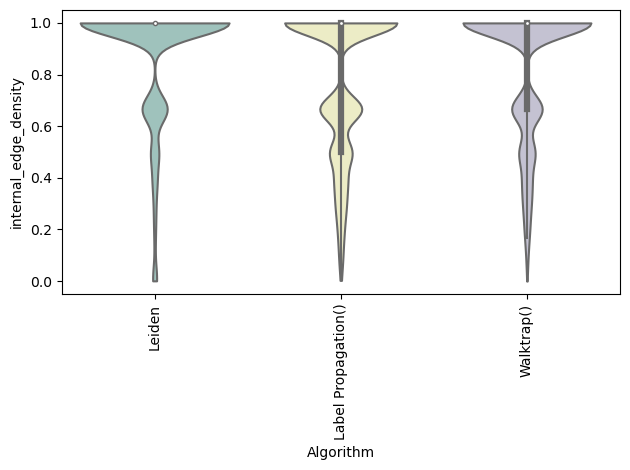

In [47]:
viz.plot_com_stat([leiden_coms, lp_coms, walk_coms], evaluation.internal_edge_density)

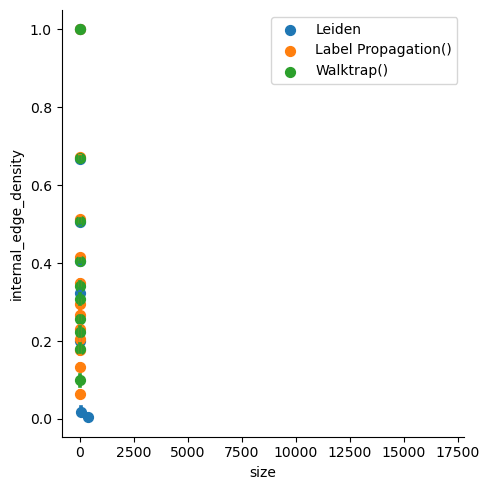

In [48]:
viz.plot_com_properties_relation([leiden_coms, lp_coms, walk_coms], evaluation.size, evaluation.internal_edge_density)

# Qualitative evaluation 

In [49]:
def community_purity(coms, nth):
    purities = []
    for c in coms.communities:
        houses = []
        for node in c:
            if node in nth:
                houses.extend(nth[node])
        
        cnt = Counter(houses)
        purity = max(cnt.values())/sum(cnt.values())
        purities.append(purity)
    return purities

In [50]:
leiden_purities = community_purity(leiden_coms, G)
leiden_purities

[0.05175931916587866,
 0.10157556553120324,
 0.04357487922705314,
 0.034521313766596784,
 0.030798240100565682,
 0.052853653120142126,
 0.022482014388489208,
 0.01730959446092977,
 0.04821511358368104,
 0.02477763659466328,
 0.018795180722891568,
 0.05892857142857143,
 0.0347758887171561,
 0.017826336975273145,
 0.028115015974440896,
 0.06319218241042346,
 0.019886363636363636,
 0.01901639344262295,
 0.04101722723543889,
 0.022533022533022532,
 0.02332657200811359,
 0.025157232704402517,
 0.04220183486238532,
 0.02483660130718954,
 0.05084745762711865,
 0.015151515151515152,
 0.05070422535211268,
 0.04085603112840467,
 0.06666666666666667,
 0.09349593495934959,
 0.039792387543252594,
 0.06336633663366337,
 0.09737827715355805,
 0.06680584551148225,
 0.18777292576419213,
 0.1574074074074074,
 0.375,
 0.16071428571428573,
 0.21428571428571427,
 0.5,
 0.5,
 0.32142857142857145,
 0.2916666666666667,
 0.375,
 0.25,
 0.2,
 0.2631578947368421,
 0.45,
 0.42857142857142855,
 0.4,
 0.41176470588

In [51]:
np.mean(leiden_purities), np.std(leiden_purities)

(0.48043935229993984, 0.07571811224683009)

In [52]:
lp_purities = community_purity(lp_coms, G)
lp_purities

[0.17219787100814027,
 0.13198724760892666,
 0.09654104284976768,
 0.18752997601918464,
 0.06465833945628215,
 0.16757246376811594,
 0.1309408341416101,
 0.11092851273623665,
 0.22815533980582525,
 0.03571428571428571,
 0.11851015801354402,
 0.16607773851590105,
 0.15196998123827393,
 0.05257393209200438,
 0.2413793103448276,
 0.14898989898989898,
 0.2077922077922078,
 0.2147887323943662,
 0.061052631578947365,
 0.0874751491053678,
 0.24553571428571427,
 0.1824561403508772,
 0.11764705882352941,
 0.06310679611650485,
 0.22797927461139897,
 0.4673913043478261,
 0.31666666666666665,
 0.1626984126984127,
 0.37168141592920356,
 0.029612756264236904,
 0.35135135135135137,
 0.2689655172413793,
 0.22807017543859648,
 0.21965317919075145,
 0.07848837209302326,
 0.26811594202898553,
 0.06875,
 0.1782178217821782,
 0.4186046511627907,
 0.1881720430107527,
 0.13127413127413126,
 0.40476190476190477,
 0.2328767123287671,
 0.18674698795180722,
 0.3055555555555556,
 0.25892857142857145,
 0.207792207

In [53]:
np.mean(lp_purities), np.std(lp_purities)

(0.30466424405436987, 0.14020417975910532)

In [54]:
walk_purities = community_purity(walk_coms, G)
walk_purities

[0.020080846510521937,
 0.07017543859649122,
 0.05660377358490566,
 0.3467741935483871,
 0.4673913043478261,
 0.3135593220338983,
 0.4,
 0.2403846153846154,
 0.4069767441860465,
 0.4230769230769231,
 0.16666666666666666,
 0.18421052631578946,
 0.4,
 0.1076923076923077,
 0.42857142857142855,
 0.14864864864864866,
 0.21818181818181817,
 0.2786885245901639,
 0.1044776119402985,
 0.17857142857142858,
 0.40476190476190477,
 0.1875,
 0.14583333333333334,
 0.1702127659574468,
 0.32558139534883723,
 0.16666666666666666,
 0.47058823529411764,
 0.47058823529411764,
 0.17777777777777778,
 0.14285714285714285,
 0.16,
 0.5,
 0.5,
 0.125,
 0.23076923076923078,
 0.22857142857142856,
 0.16216216216216217,
 0.23529411764705882,
 0.14285714285714285,
 0.11764705882352941,
 0.3548387096774194,
 0.46153846153846156,
 0.375,
 0.37037037037037035,
 0.15625,
 0.3448275862068966,
 0.2857142857142857,
 0.375,
 0.27586206896551724,
 0.3333333333333333,
 0.14285714285714285,
 0.3103448275862069,
 0.2857142857142

In [55]:
np.mean(walk_purities), np.std(walk_purities)

(0.42239270053859057, 0.09057187388952538)

# Ground Truth evaluation 

<AxesSubplot:xlabel='graph', ylabel='score'>

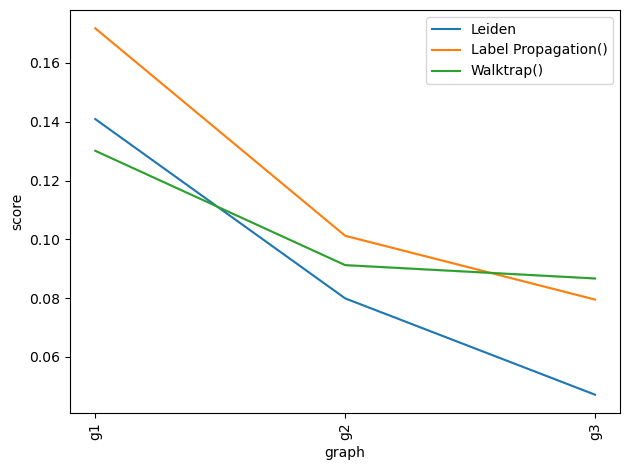

In [56]:
g1 = LFR_benchmark_graph(1000, 3, 1.5, 0.5, min_community=20, average_degree=5)
g2 = LFR_benchmark_graph(1000, 3, 1.5, 0.6, min_community=20, average_degree=5)
g3 = LFR_benchmark_graph(1000, 3, 1.5, 0.7, min_community=20, average_degree=5)

names = ["g1", "g2", "g3"]
graphs = [g1, g2, g3]
references = []

# building the NodeClustering ground truth for the graphs
for g in graphs:
    ground_truth = NodeClustering(communities={frozenset(g.nodes[v]['community']) for v in g}, graph=g, method_name="reference")
    references.append(ground_truth)
    
algos = [algorithms.leiden, algorithms.label_propagation,algorithms.walktrap]

# Computing the visualization (2 execution per method, NMI as scoring for ground truth resemblance)
viz.plot_scoring(graphs, references, names, algos, scoring=evaluation.adjusted_mutual_information, nbRuns=2)

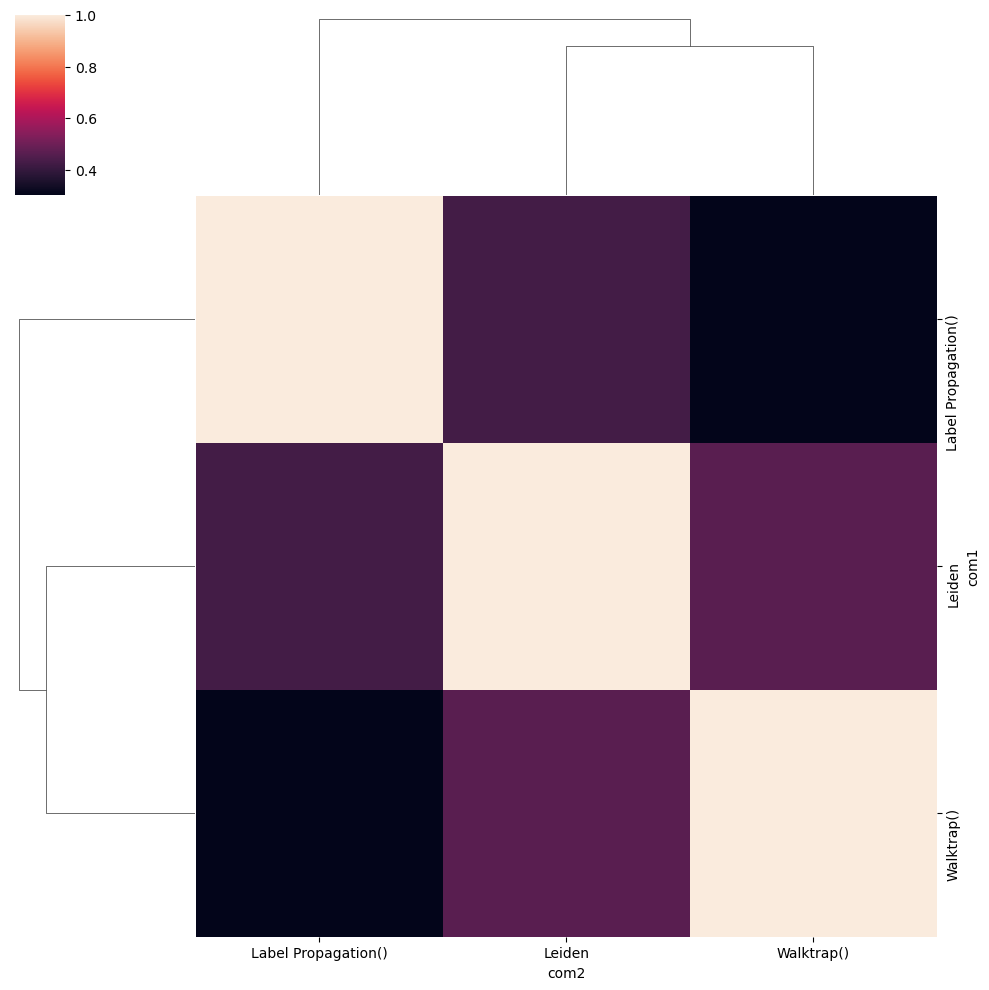

In [57]:
viz.plot_sim_matrix([leiden_coms, lp_coms, walk_coms],evaluation.adjusted_mutual_information)